In [4]:
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import lernnavi_preprocess as pp

rows = pp.load_mastery_array()
mastery_df_german, mastery_df_math = pp.get_mastery_dfs(rows)

---Starting data loading---
	-->Loading users...
		Users loaded
	-->Loading events...
		Events loaded
	-->Loading transactions...
		Transactions loaded
	-->Loading documents...
		Documents loaded
	-->Loading topics translated...
		Topics translated loaded
---Data loading finished!---


Parsing mastery levels...:   0%|          | 0/1093791 [00:00<?, ?it/s]

---Starting dataframe creation---
	-->Creating the initial dataframe...
		Initial dataframe created
	-->Starting feature extension, merging tables...
		Tables merged
	-->Finding weekly questions solved...
		Weekly questions solved found
	-->Finding weekly correct questions solved...
		Weekly correct questions solved found
	-->Finding weekly partially correct questions solved...
		Weekly partially correct questions solved found
	-->Finding weekly review task count...
		Weekly review task count found
	-->Finding weekly view count...
		Weekly view count found
	-->Finding weekly window visible ratio...
		Weekly window visible ratio found
	-->Constructing the final dataframes...
		Final dataframes constructed
---Dataframe creation finished! ---


In [1]:
from tqdm import notebook as vis

In [2]:
import cluster

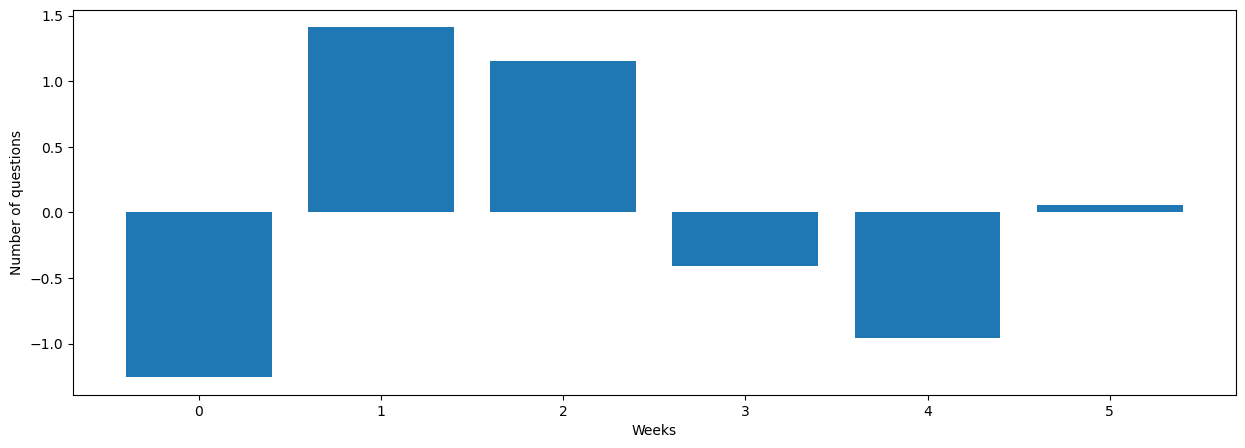

In [5]:
user_ids_german, data_german = cluster.prepare_data(students=mastery_df_german,min_week=6, scale = True)
cluster.visualize_data(data_german[len(data_german)-1]) # We visualize one student's data

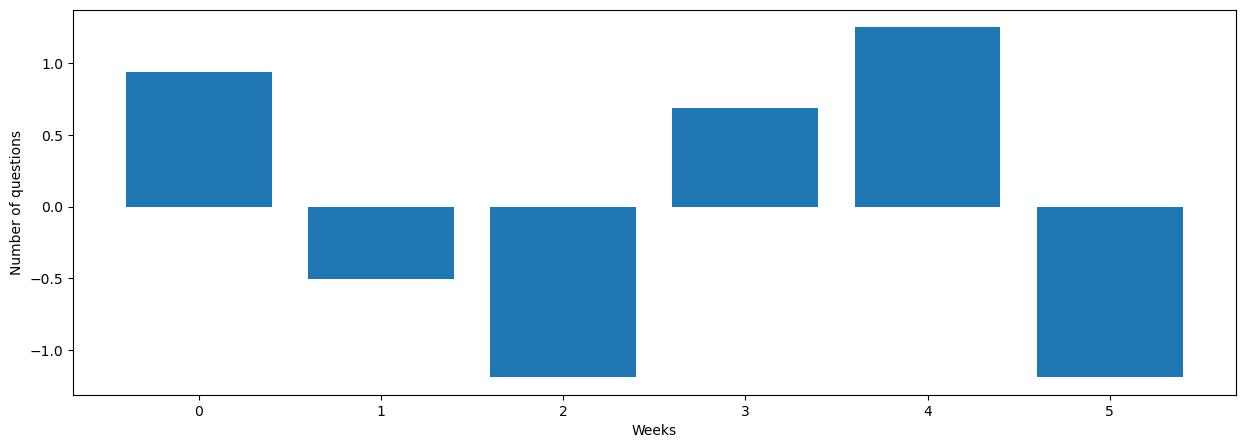

In [6]:
user_ids_math, data_math = cluster.prepare_data(students=mastery_df_math,min_week=6, scale = True)
cluster.visualize_data(data_math[len(data_math)-1]) # We visualize one student's data

In [10]:
print(data_german.shape)
print("__________________________")
data_german

(1024, 6)
__________________________


array([[-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798,
        -0.4472136 ],
       [-0.48087792, -0.8014632 , -0.41676087,  0.48087792,  2.01968728,
        -0.8014632 ],
       [ 2.23606798, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.4472136 ],
       ...,
       [-0.71316586,  2.0750826 ,  0.30827169, -0.24385671, -0.79598512,
        -0.6303466 ],
       [-0.82230257,  1.883932  ,  0.17182442, -1.31936606,  0.02454635,
         0.06136586],
       [-1.2560152 ,  1.41125304,  1.15722749, -0.40926338, -0.95965206,
         0.05645012]])

In [11]:
len(user_ids_german)

1024

## WARNING START
##      BELOW CELLS TAKE A REALLY LONG TIME TO RUN!!!!
### (They create the images under the ./images folder)
## For german

In [7]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_german/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  1


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

window:  2


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

In [8]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_german/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  3


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  4


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [9]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_german/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  5


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  6


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [73]:
D = cluster.get_distance_matrix(data, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

## For math

In [12]:
from tslearn.metrics import cdist_dtw
windows = [1,2]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  1


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

window:  2


Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

In [13]:
windows = [3,4]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  3


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  4


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [15]:
windows = [5,6]
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 1).tolist() + np.arange(10, 30, 10).tolist() + np.arange(30, 100, 30).tolist()
n_cluster_list = range(2, 30)
for window in vis.tqdm(windows, desc='Sweeping windows'):
    print("window: ", window)
    D = cluster.get_distance_matrix(data_math, metric='dtw', window=window)
    for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
        if gamma == 0: continue
        #print("\tgamma: ", gamma)
        S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
        W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
        df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={window}', filename=f'gamma_{gamma}.png')
        plt.close('all')

Sweeping windows:   0%|          | 0/2 [00:00<?, ?it/s]

window:  5


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

window:  6


Sweeping gammas:   0%|          | 0/17 [00:00<?, ?it/s]

In [16]:
D = cluster.get_distance_matrix(data_math, metric='e')
gammas = [0.01, 0.1, 0.5, 1] + np.arange(2, 10, 0.5).tolist() + np.arange(10, 30, 1).tolist() + np.arange(30, 100, 10).tolist()
n_cluster_list = range(2, 30)
for gamma in vis.tqdm(gammas, desc='Sweeping gammas'):
    if gamma == 0: continue
    #print("\tgamma: ", gamma)
    S = cluster.get_affinity_matrix(D, gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
    W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
    df_labels = cluster.get_heuristics_spectral(W, n_cluster_list, save=True, outdir=f'Images_math/scaled/window={0}', filename=f'gamma_{gamma}.png')
    plt.close('all')

Sweeping gammas:   0%|          | 0/47 [00:00<?, ?it/s]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[6.87960595e-15 3.58682989e-06 1.87169283e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[6.01556455e-15 3.08607629e-06 1.25651095e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 1585 with accuracies 
[5.09464238e-15 1.41002076e-06 2.09452916e-05 1.94439519e-05
 9.93071234e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[

## WARNING END

In [7]:
import pandas as pd
def get_original_rows(user_ids, labels, original_df, min_weeks=6):
    """
    This function is used to get the non-scaled version of the data, in the case that cluster.prepare_data() function
    was used with scaled=True
    """
    temp = original_df.merge(pd.DataFrame({'user_id': user_ids, 'cluster': labels}), on='user_id', how='inner')
    temp = temp[temp['weeks_since_first_transaction'] < min_weeks]
    temp = (temp.sort_values(['user_id', 'weeks_since_first_transaction'], ascending=True)
                .groupby('user_id')
                .agg({'num_questions': lambda x: list(x)}))
    temp = temp[temp['num_questions'].apply(lambda x: sum(x)) > 0]
    temp.reset_index(inplace=True)
    temp = np.asarray(temp.num_questions.values.tolist())
    return temp

In [10]:
windows = [0,1,2,3,4,5,6]
#For german
D_for_window_german = {
    window: cluster.get_distance_matrix(data_german, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data_german, metric='e') for window in windows
}
#For math
D_for_window_math = {
    window: cluster.get_distance_matrix(data_math, metric='dtw', window=window) if window != 0 else cluster.get_distance_matrix(data_math, metric='e') for window in windows
}

Number of clusters: 4, Label Length: 1024
Group 0 has 165 students
Group 1 has 194 students
Group 2 has 176 students
Group 3 has 489 students


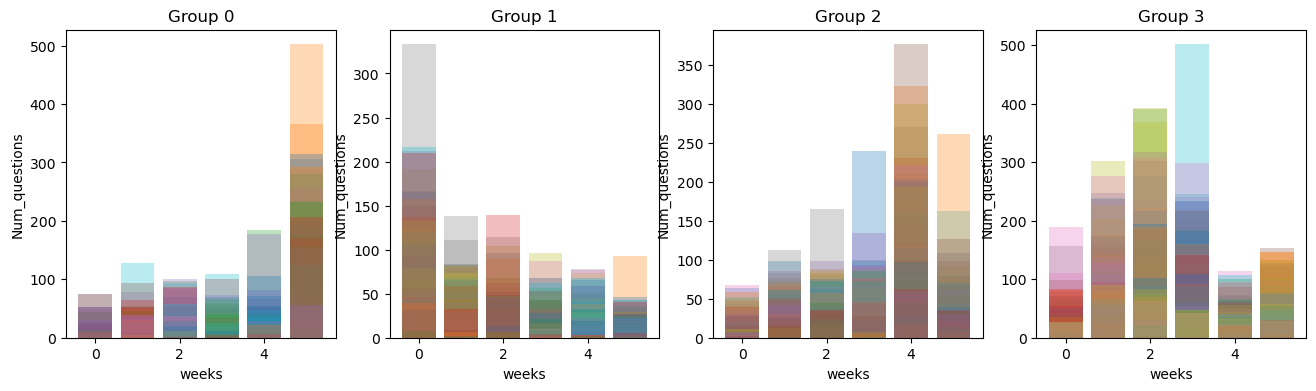

In [12]:
#GERMAN
gamma = 5
k = 4
window = 0
S = cluster.get_affinity_matrix(D_for_window_german[window], gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)

Number of clusters: 4, Label Length: 733
Group 0 has 100 students
Group 1 has 257 students
Group 2 has 88 students
Group 3 has 288 students


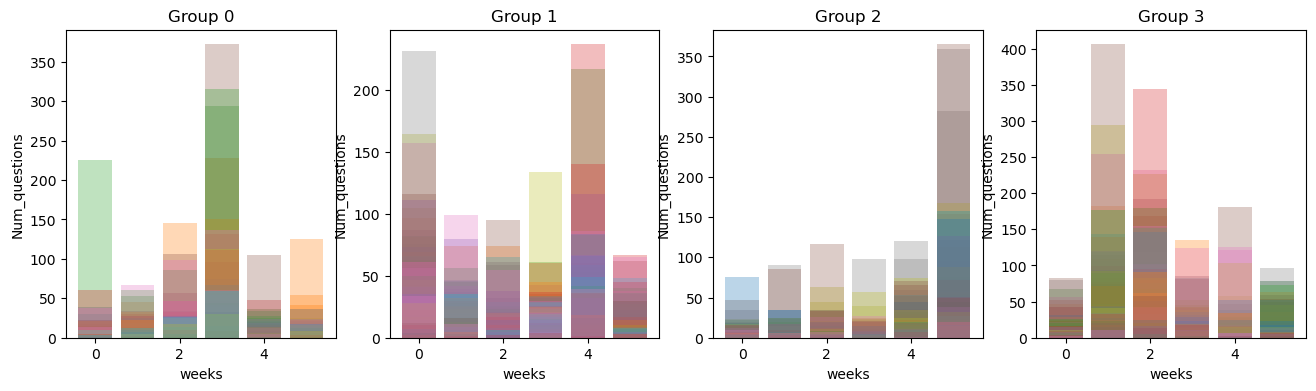

In [13]:
#MATH
gamma = 5
k = 4
window = 0
S = cluster.get_affinity_matrix(D_for_window_math[window], gamma) # Get similarity matrix, gamma is the parameter for the exponential function, higher gamma means points that are further away will be more similar
W = cluster.get_adjacency(S) # From this similarity matrix we get the adjacency matrix, i.e. the matrix that contains the edges between the nodes, meaning we construct a graph
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)

window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 167 students
Group 1 has 667 students
Group 2 has 190 students


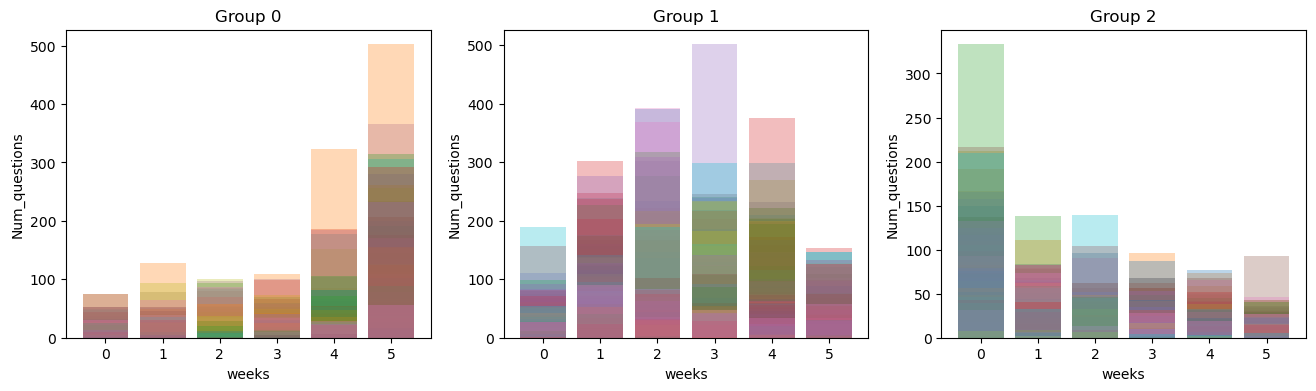

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 668 students
Group 1 has 166 students
Group 2 has 190 students


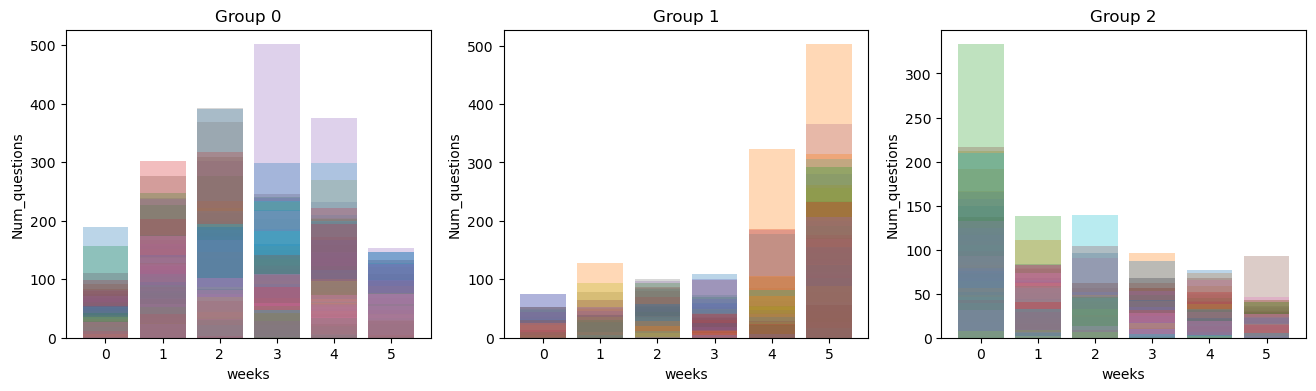

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


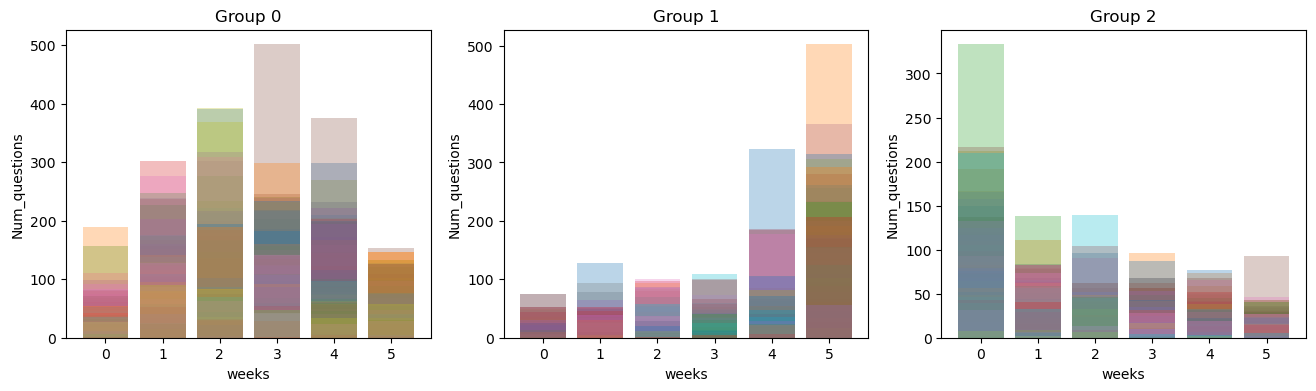

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


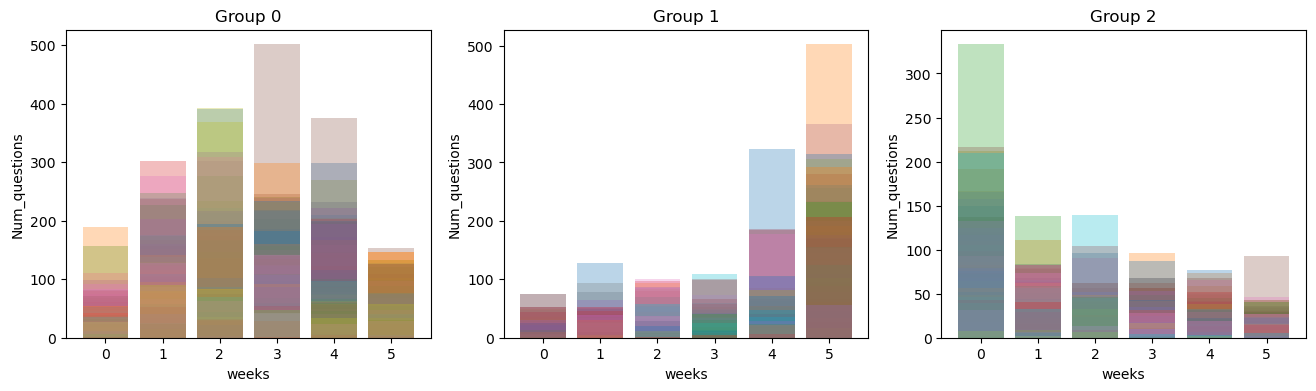

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


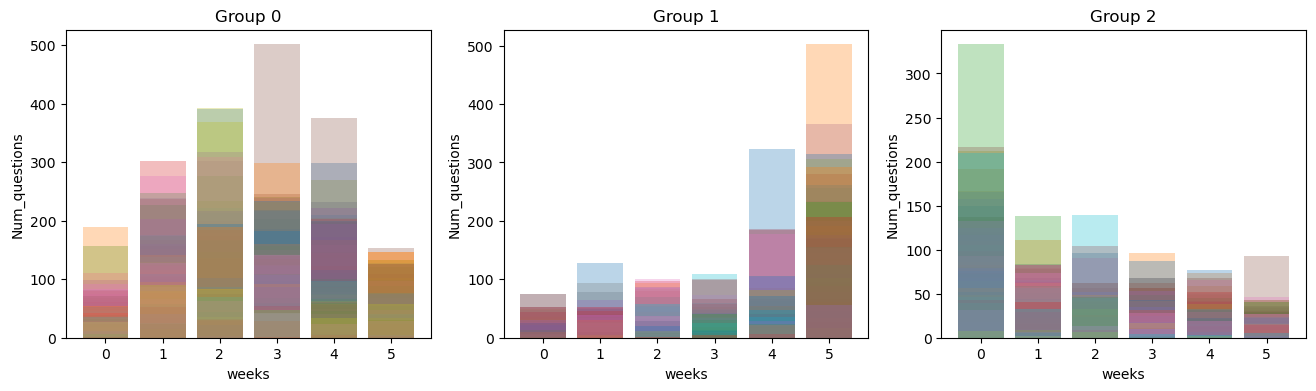

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 669 students
Group 1 has 165 students
Group 2 has 190 students


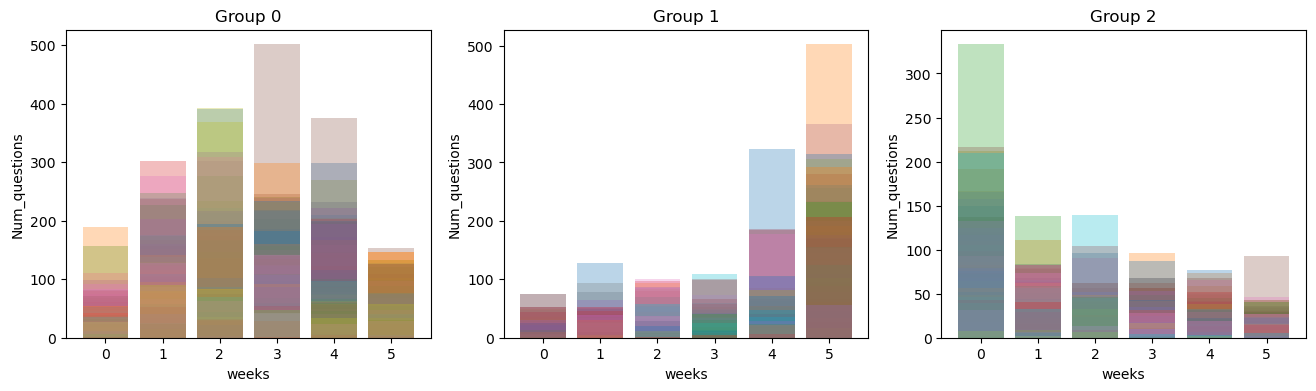

_________________________________________________________


In [15]:
#GERMAN
gamma = 5
k = 3
for window in windows:
    if window == 0: continue
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 82 students
Group 2 has 184 students


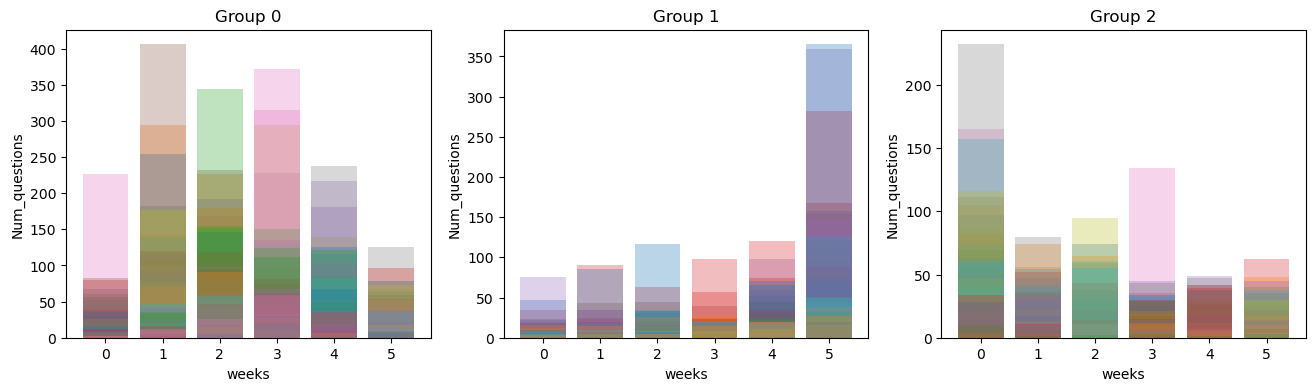

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


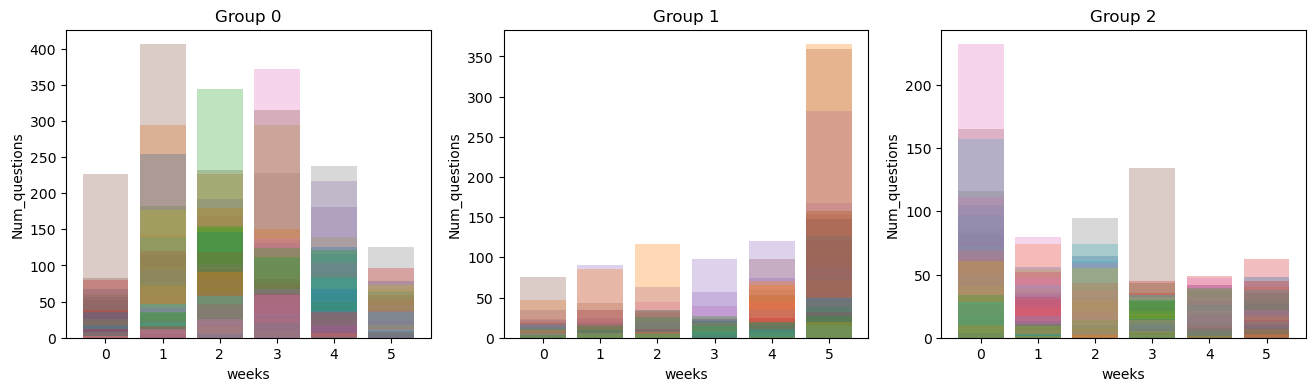

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


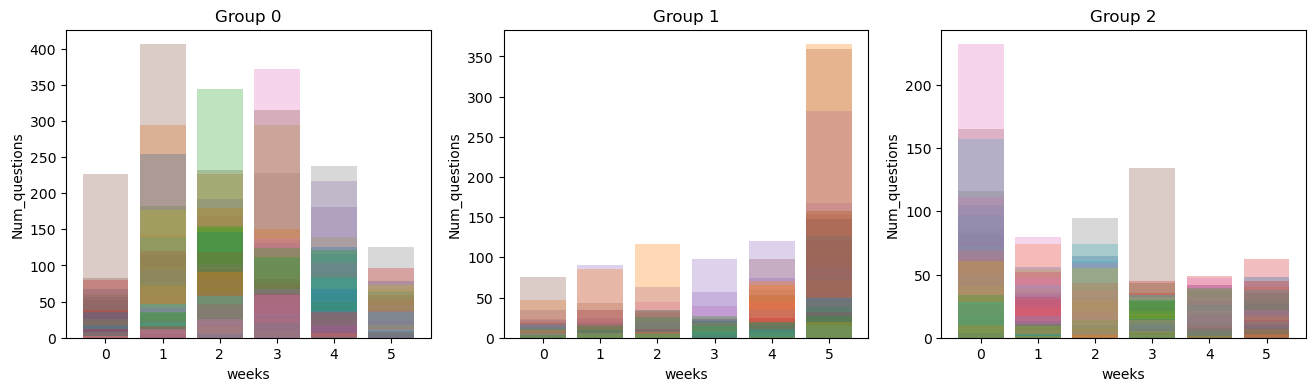

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


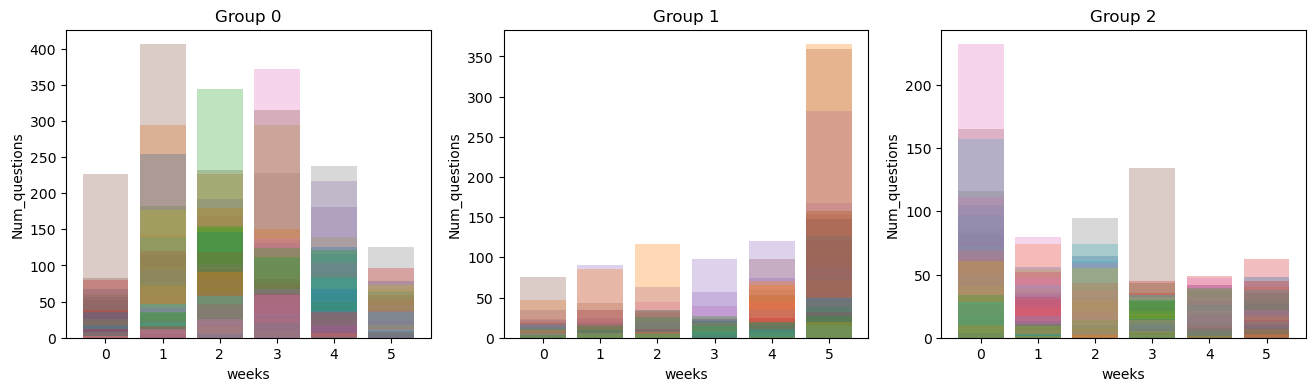

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


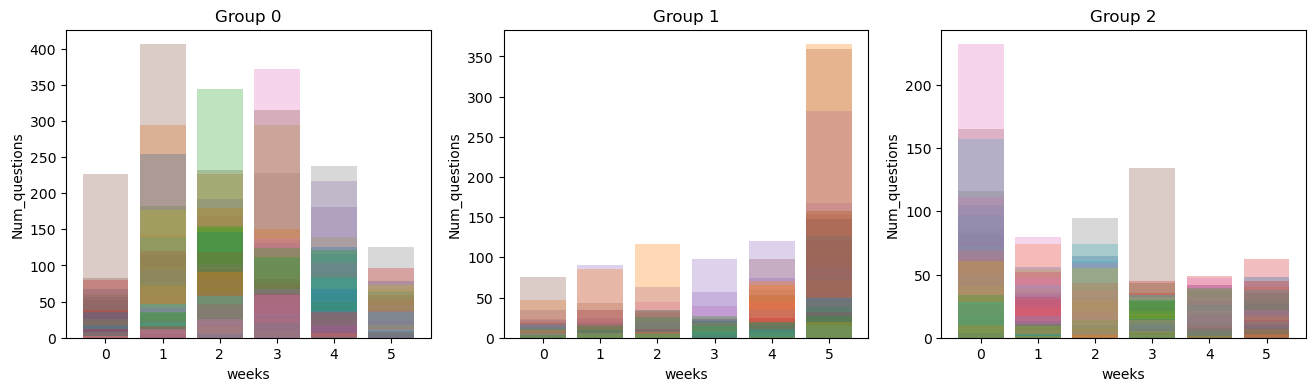

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 467 students
Group 1 has 83 students
Group 2 has 183 students


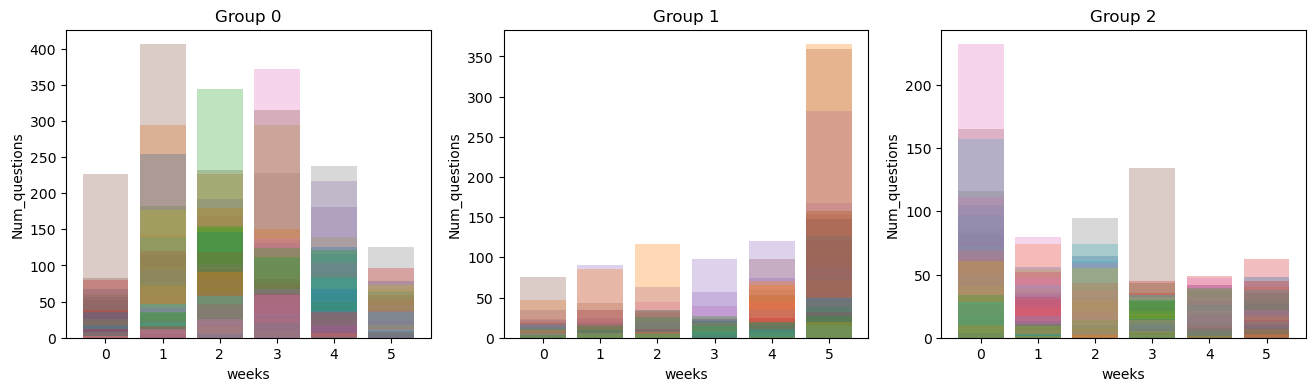

_________________________________________________________


In [17]:
#MATH
gamma = 5
k = 3
for window in windows:
    if window == 0: continue
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 1024
Group 0 has 542 students
Group 1 has 289 students
Group 2 has 193 students


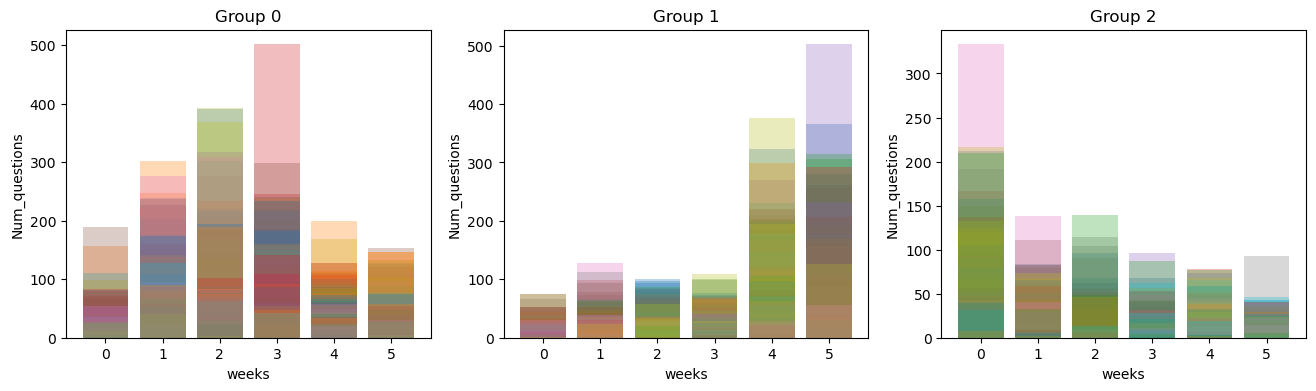

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 655 students
Group 1 has 171 students
Group 2 has 198 students


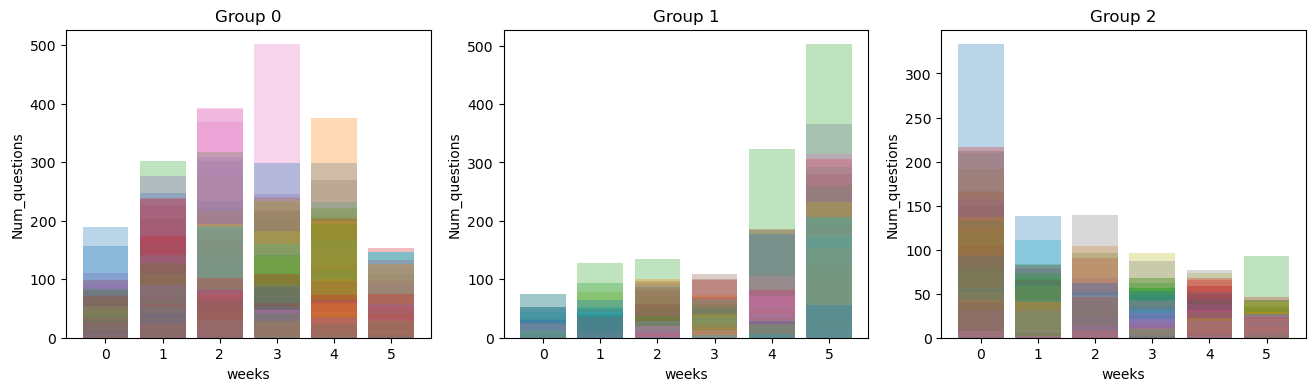

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 654 students
Group 1 has 174 students
Group 2 has 196 students


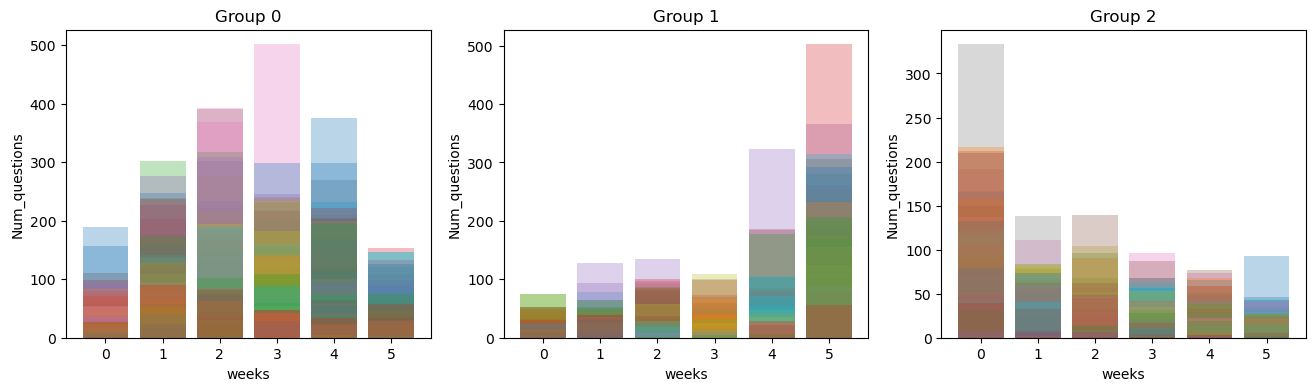

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


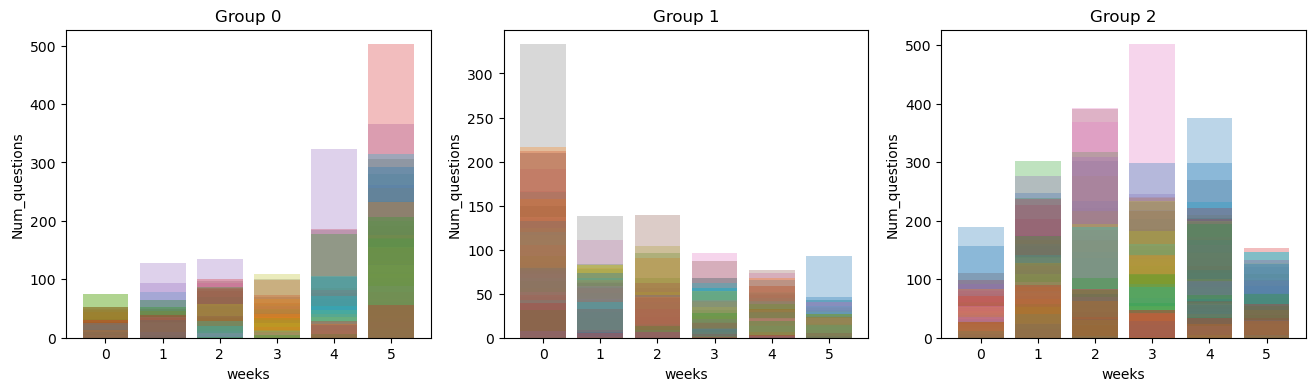

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


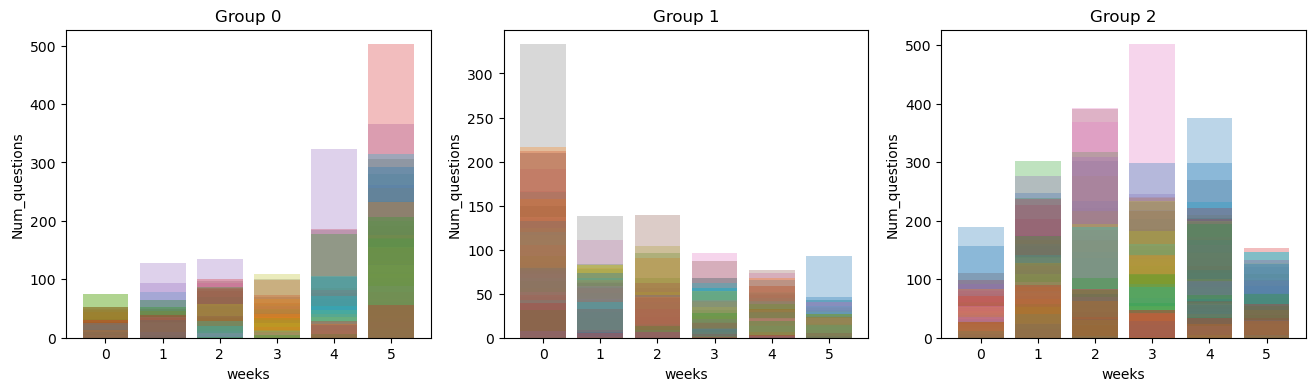

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


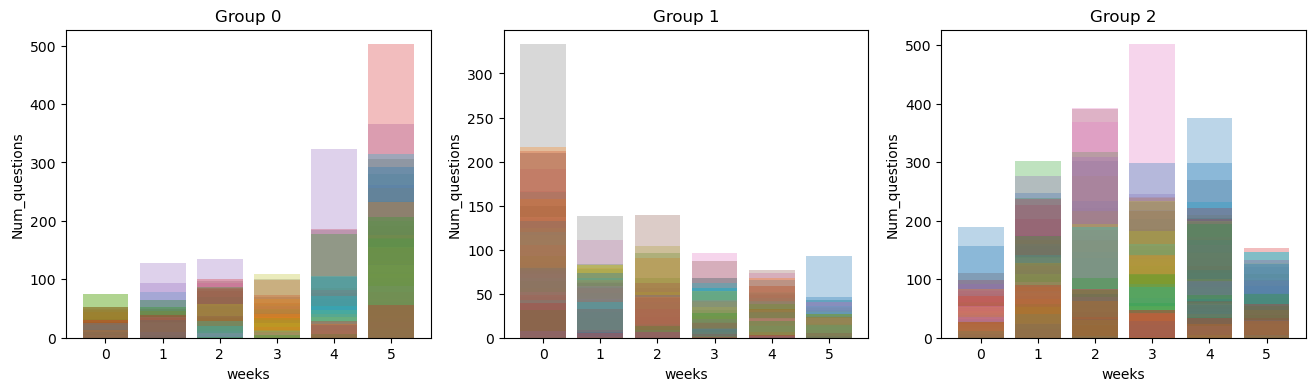

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 174 students
Group 1 has 196 students
Group 2 has 654 students


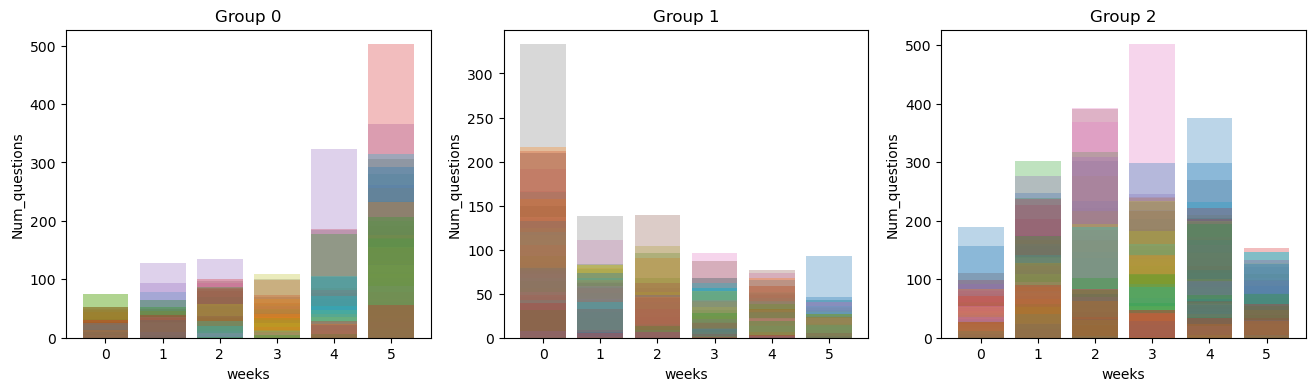

_________________________________________________________


In [18]:
#GERMAN
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 733
Group 0 has 350 students
Group 1 has 298 students
Group 2 has 85 students


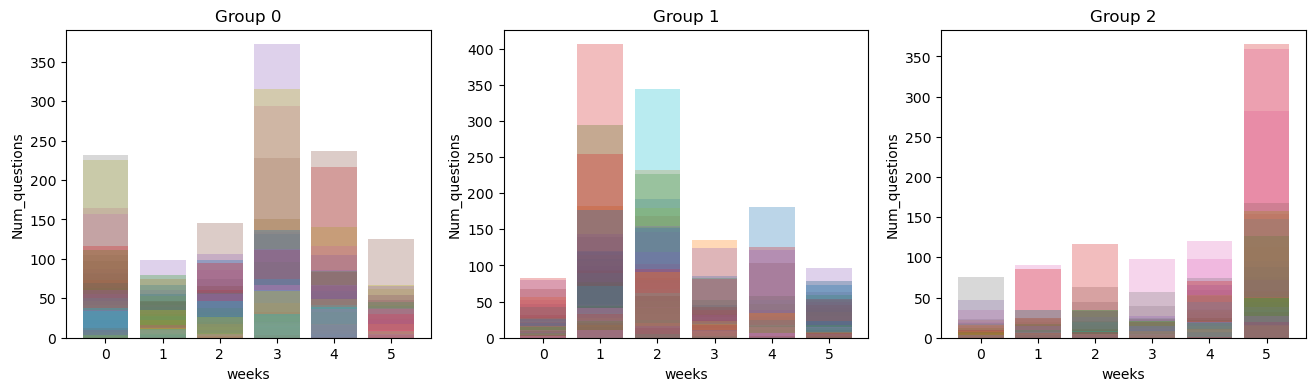

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 471 students
Group 1 has 186 students
Group 2 has 76 students


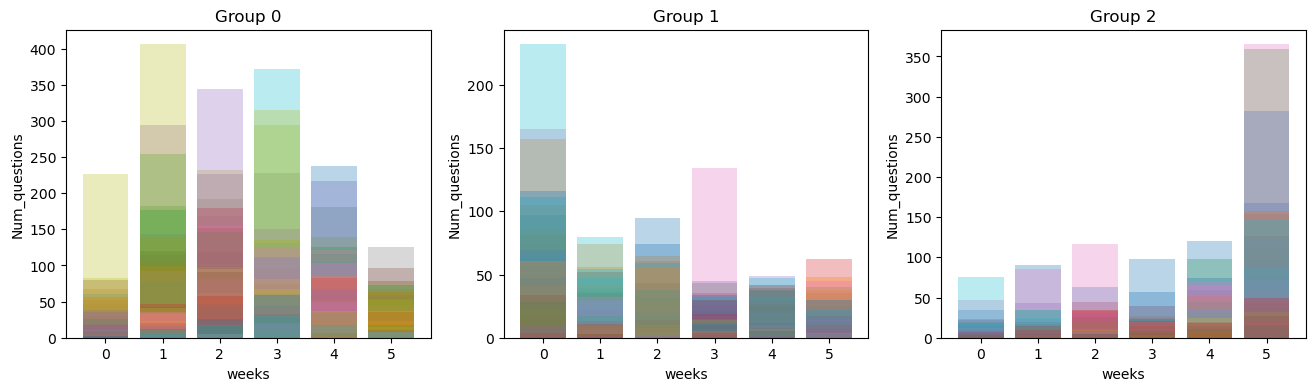

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


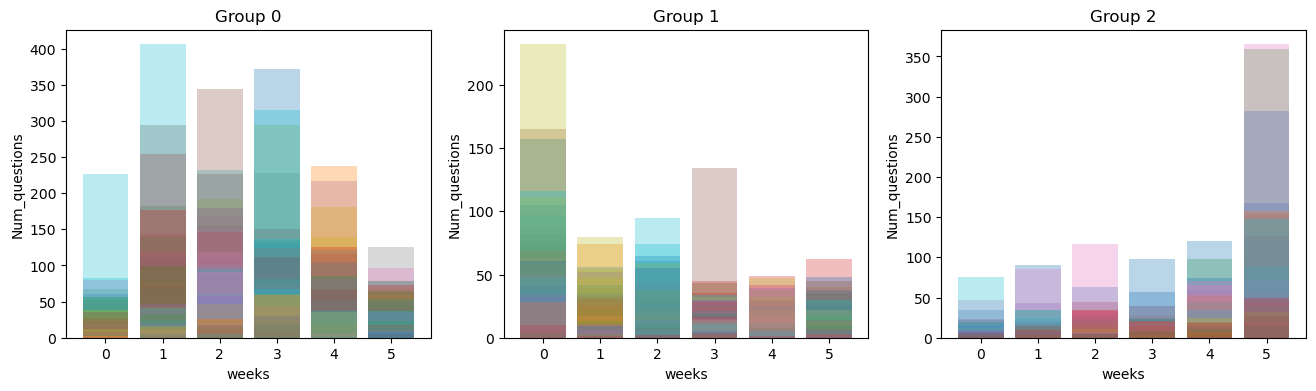

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


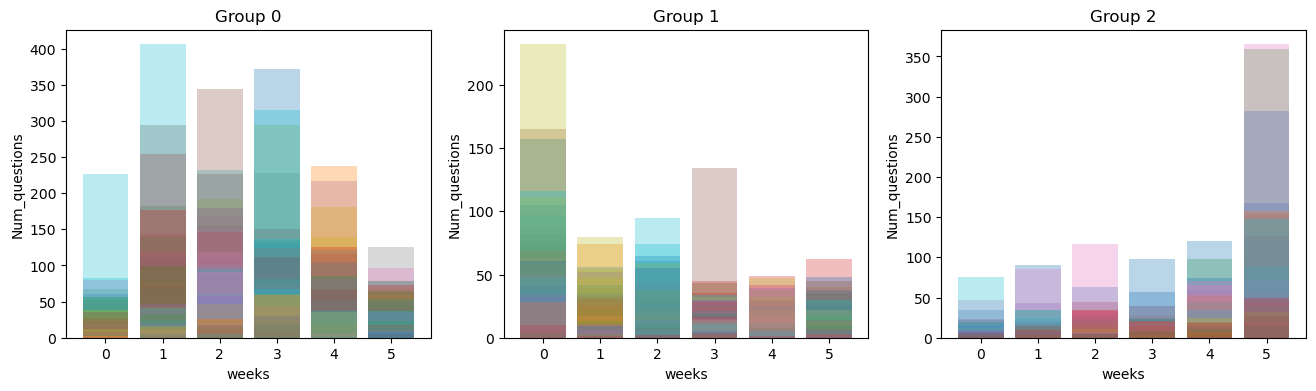

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


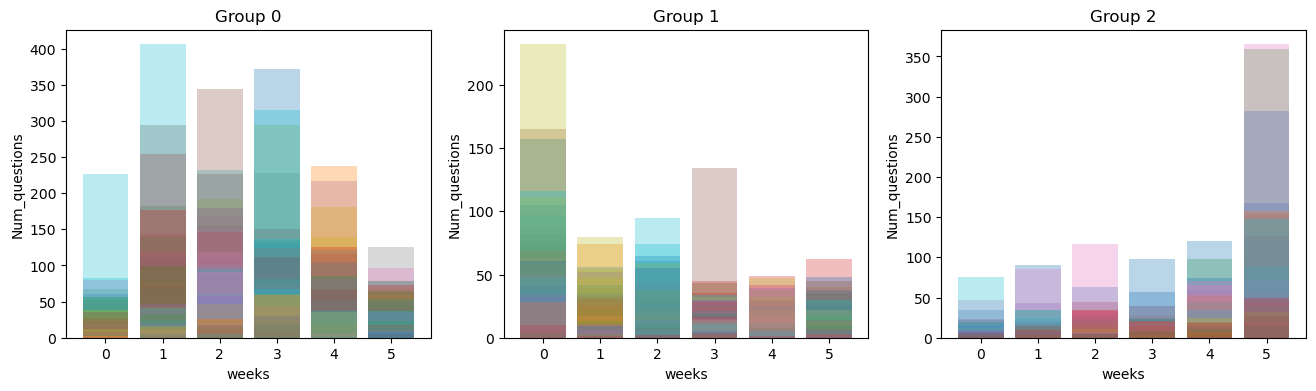

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


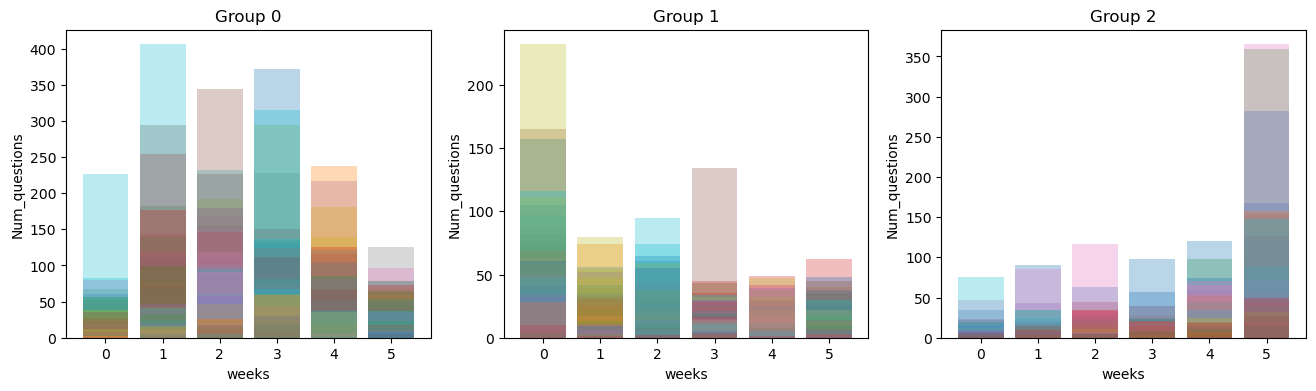

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 472 students
Group 1 has 185 students
Group 2 has 76 students


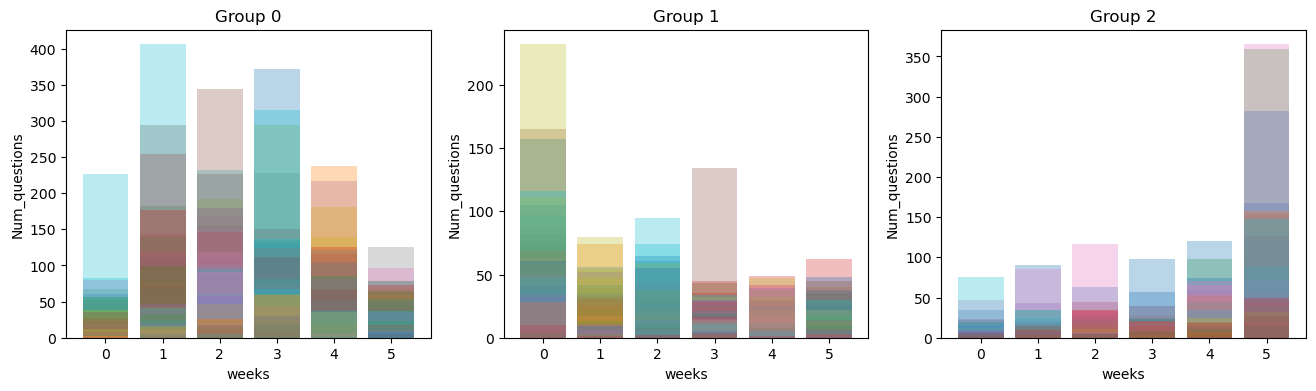

_________________________________________________________


In [19]:
#MATH
gamma = 10
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 1024
Group 0 has 304 students
Group 1 has 527 students
Group 2 has 193 students


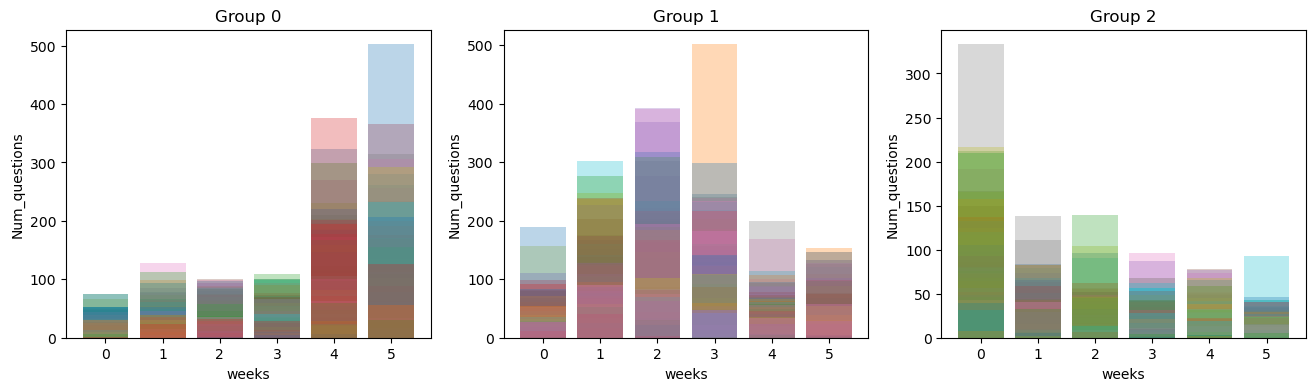

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 1024
Group 0 has 188 students
Group 1 has 204 students
Group 2 has 632 students


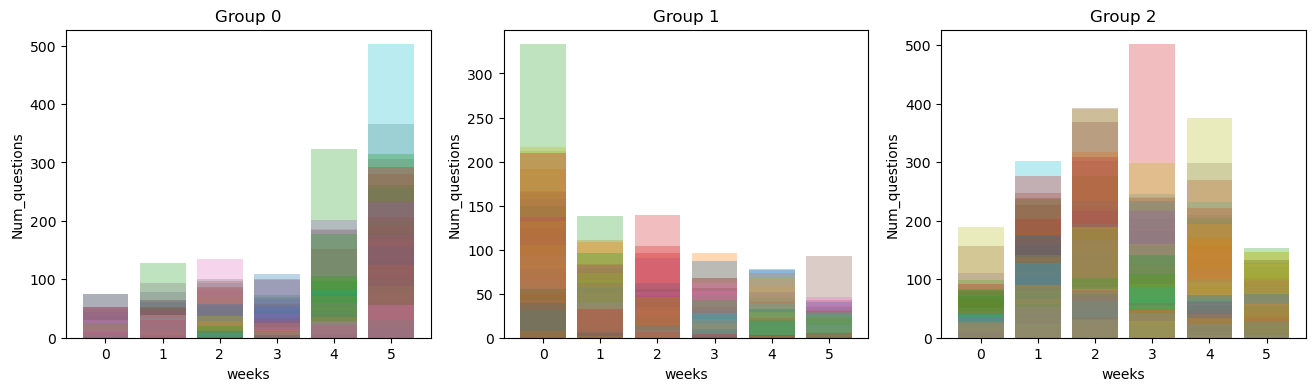

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


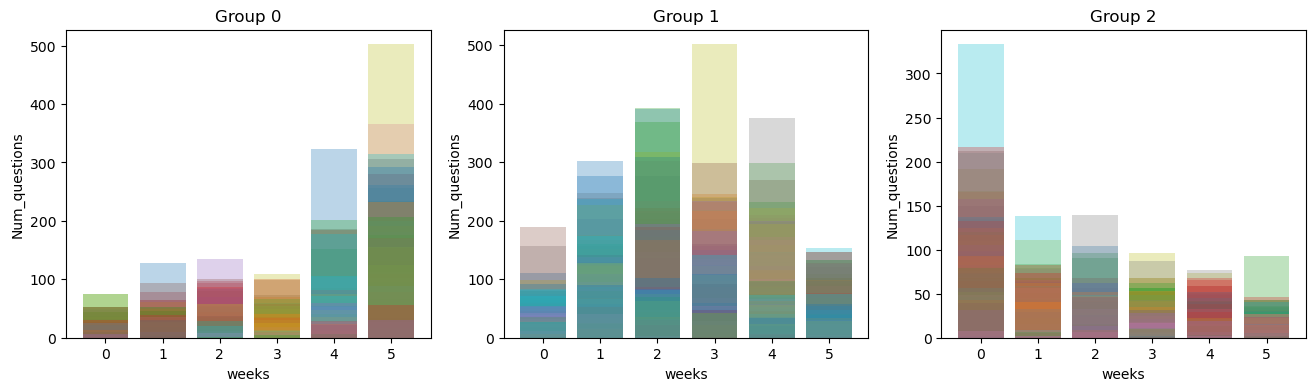

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


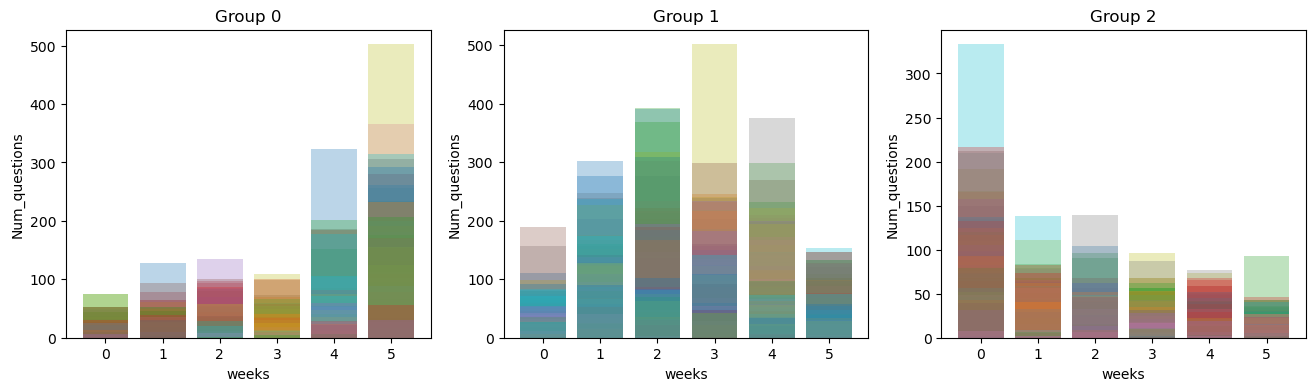

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


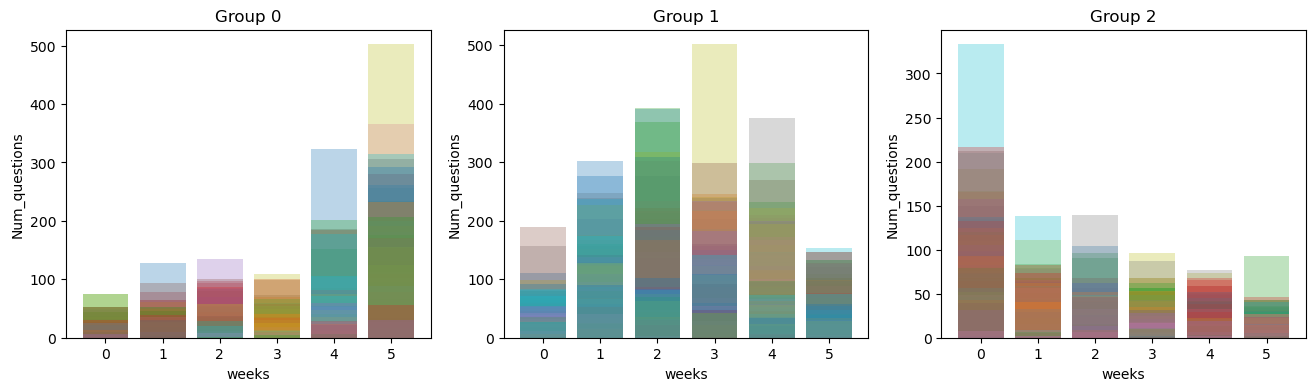

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


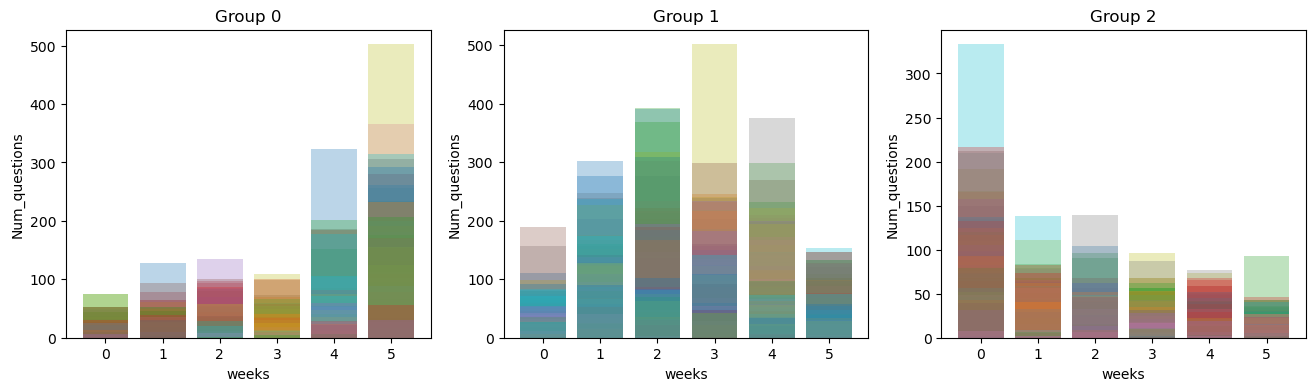

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 1024
Group 0 has 185 students
Group 1 has 641 students
Group 2 has 198 students


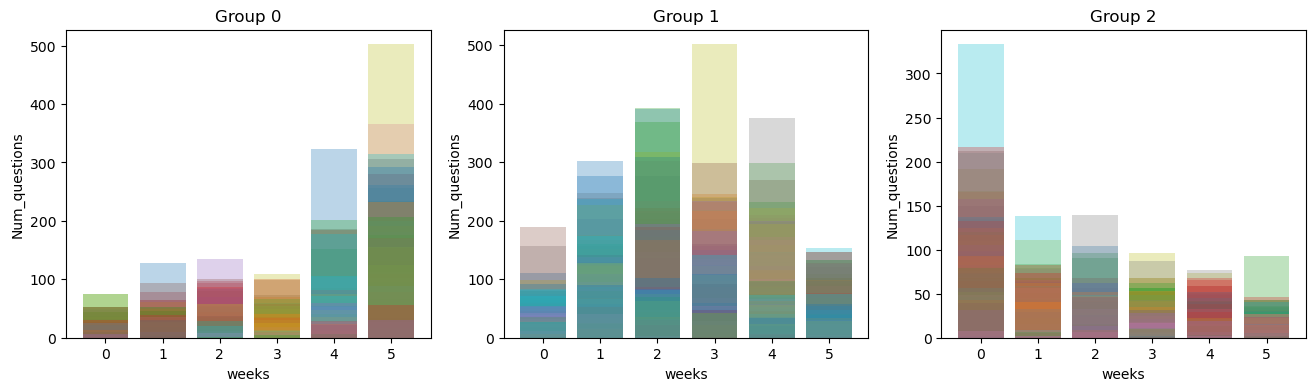

_________________________________________________________


In [24]:
#GERMAN
gamma = 1
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_german, kmeans.labels_, mastery_df_german, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

window:  0
Number of clusters: 3, Label Length: 733
Group 0 has 337 students
Group 1 has 293 students
Group 2 has 103 students


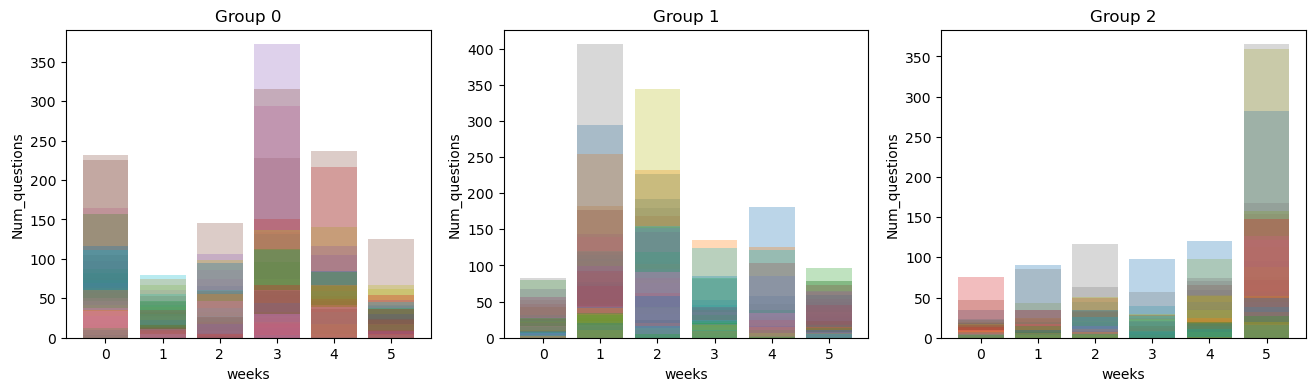

_________________________________________________________
window:  1
Number of clusters: 3, Label Length: 733
Group 0 has 444 students
Group 1 has 95 students
Group 2 has 194 students


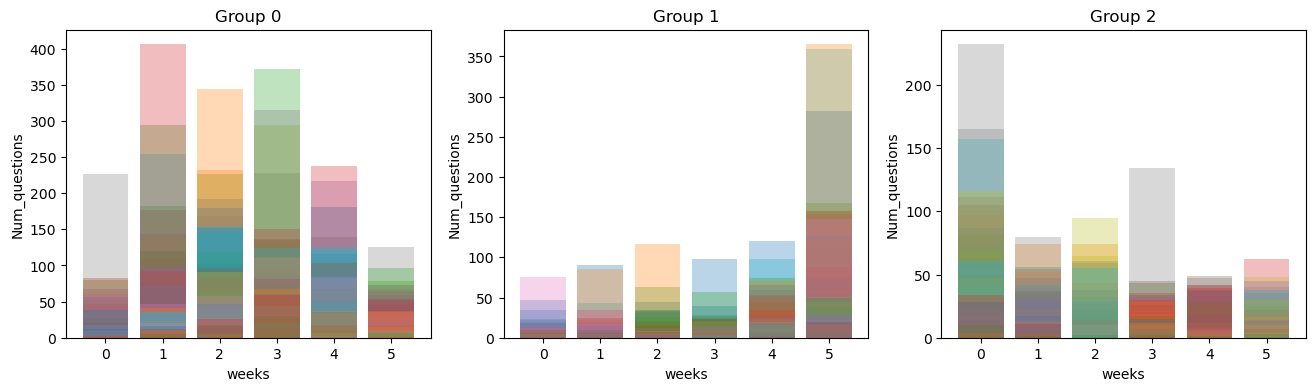

_________________________________________________________
window:  2
Number of clusters: 3, Label Length: 733
Group 0 has 446 students
Group 1 has 95 students
Group 2 has 192 students


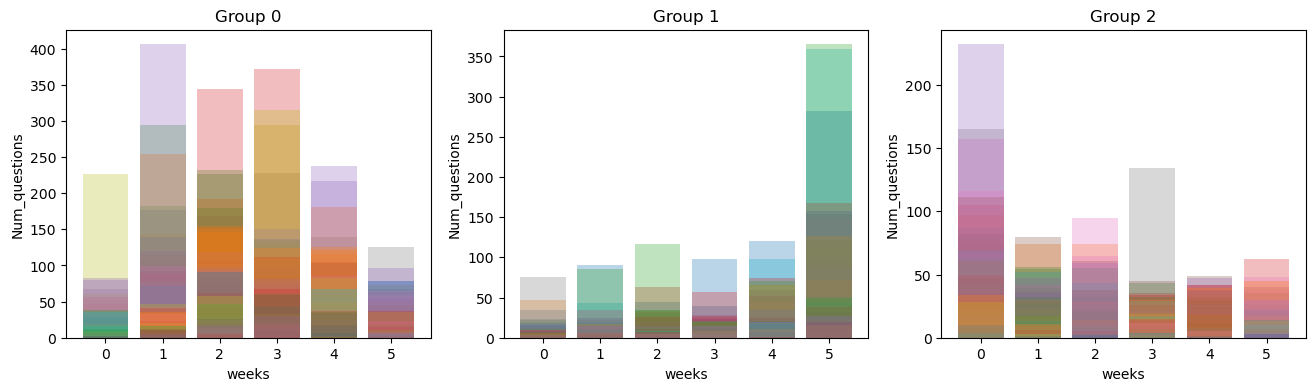

_________________________________________________________
window:  3
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


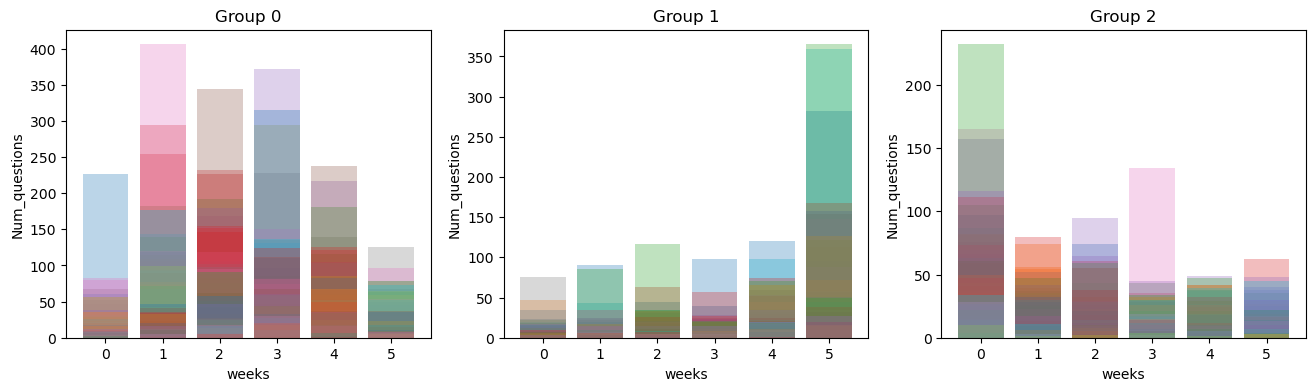

_________________________________________________________
window:  4
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


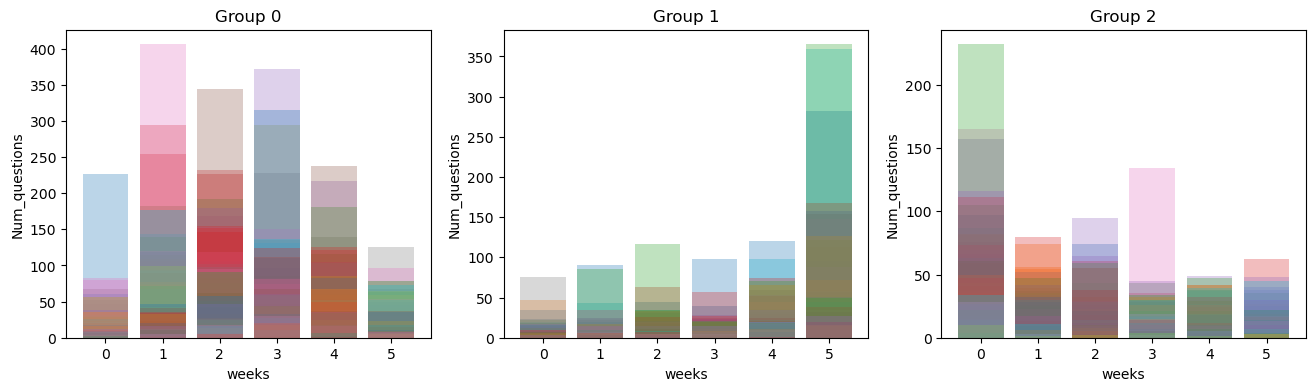

_________________________________________________________
window:  5
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


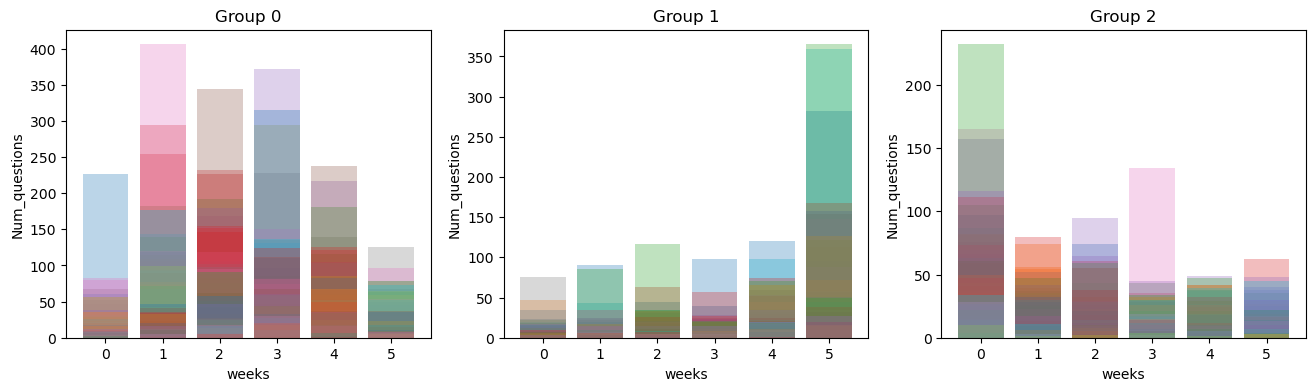

_________________________________________________________
window:  6
Number of clusters: 3, Label Length: 733
Group 0 has 448 students
Group 1 has 95 students
Group 2 has 190 students


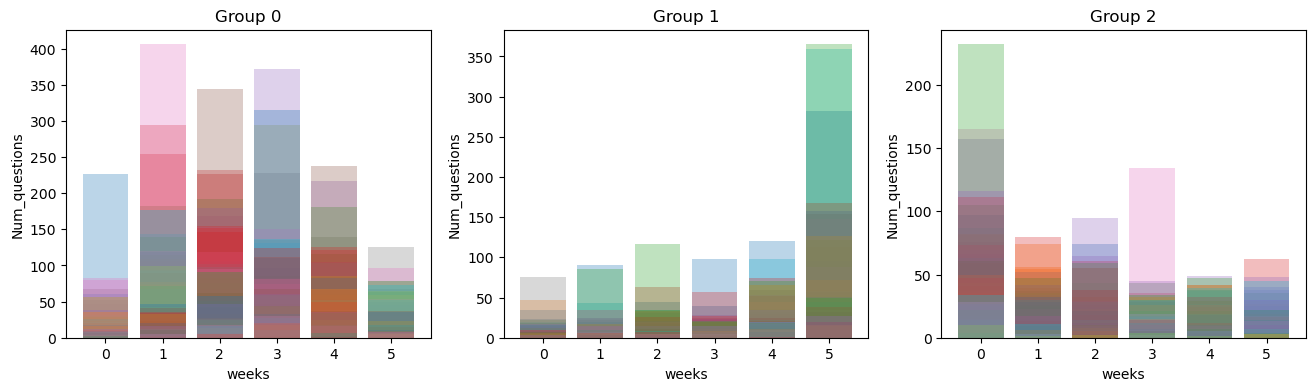

_________________________________________________________


In [23]:
#MATH
gamma = 1
k = 3
for window in windows:
    print("window: ", window)
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma) 
    W = cluster.get_adjacency(S, connectivity='epsilon')
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)
    cluster.visualize_clusters(get_original_rows(user_ids_math, kmeans.labels_, mastery_df_math, 6), kmeans.labels_, 6)
    print("_________________________________________________________")

Now we will add the labels to the data set

First we need to reconstruct the data set that we used for clustering

In [28]:
# from mastery_df_german, drop users that have their max_weeks_since_first_transaction < 6
min_6_weeks_german = mastery_df_german.groupby('user_id').filter(lambda x: len(x) >= 7)
min_6_weeks_german = min_6_weeks_german[min_6_weeks_german['weeks_since_first_transaction'] <= 6] # only consider their first 6 weeks...
min_6_weeks_german = min_6_weeks_german.groupby('user_id').filter(lambda x: sum(x.num_questions) > 0) # ... but only if they have answered at least one question
min_6_weeks_german.user_id.nunique()

1025

In [29]:
# from mastery_df_math, drop users that have their max_weeks_since_first_transaction < 6
min_6_weeks_math = mastery_df_math.groupby('user_id').filter(lambda x: len(x) >= 7)
min_6_weeks_math = min_6_weeks_math[min_6_weeks_math['weeks_since_first_transaction'] <= 6] # only consider their first 6 weeks...
min_6_weeks_math = min_6_weeks_math.groupby('user_id').filter(lambda x: sum(x.num_questions) > 0) # ... but only if they have answered at least one question
min_6_weeks_math.user_id.nunique()

737

Now we have the data set, we cluster with some parameters

In [30]:
gamma = 5
k = 3
window = 1
D = D_for_window_german[window]
S = cluster.get_affinity_matrix(D, gamma)
W = cluster.get_adjacency(S)
kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

# merge the labels to min_6_weeks
min_6_weeks_german_merged = min_6_weeks_german.merge(pd.DataFrame({'user_id': user_ids_german, 'cluster': kmeans.labels_}), on='user_id', how='inner')
print(min_6_weeks_german_merged.user_id.nunique())
min_6_weeks_german_merged.head()

1024


,user_id,title,weeks_since_first_transaction,mastery,diligence,num_questions,percentage_correct,num_review,num_view,ratio_window_visible,cluster
0,387604,Deutsch,0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1
1,387604,Deutsch,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1
2,387604,Deutsch,2,0.0,0.0,0.0,NaN,0.0,1.0,0.909091,1
3,387604,Deutsch,3,0.0,0.0,0.0,NaN,0.0,NaN,0.900000,1
4,387604,Deutsch,4,0.0,0.0,1.0,0.0,0.0,15.0,0.645161,1


The following cell constructs all possible combinations of clustering parameters to experiment on.

In [36]:
import os
gamma_values = [0.1, 2, 5]
k_values = [2, 3, 4]
window_values = [0, 1, 3]
combinations = []

#Create combinations of gamma, k and window variables
for i in gamma_values:
    for j in k_values:
        for k in window_values:
            combinations.append([i,j,k])

The following cell clusters the students using different parameters and saves them as .csv files under /cluster_csv folder

## For German

In [38]:
#Create folder cluster_csv if it does not exists
exists = os.path.exists("cluster_csv")
if not exists:
    os.makedirs("cluster_csv")
    
for c in combinations:
    gamma = c[0]
    k = c[1]
    window = c[2]
    D = D_for_window_german[window]
    S = cluster.get_affinity_matrix(D, gamma)
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

    # merge the labels to min_6_weeks for german
    min_6_weeks_german_merged = min_6_weeks_german.merge(pd.DataFrame({'user_id': user_ids_german, 'cluster': kmeans.labels_}), on='user_id', how='inner')
    path = f"cluster_csv/german_gamma_{gamma}_k_{k}_window_{window}.csv"
    min_6_weeks_german_merged.to_csv(path)
    

## For Math

In [39]:
import os
#Create foldeer cluster_csv if it does not exists
exists = os.path.exists("cluster_csv")
if not exists:
    os.makedirs("cluster_csv")
    
for c in combinations:
    gamma = c[0]
    k = c[1]
    window = c[2]
    D = D_for_window_math[window]
    S = cluster.get_affinity_matrix(D, gamma)
    W = cluster.get_adjacency(S)
    kmeans, proj_X, eigenvals_sorted = cluster.spectral_clustering(W, k)

    # merge the labels to min_6_weeks for math
    min_6_weeks_math_merged = min_6_weeks_math.merge(pd.DataFrame({'user_id': user_ids_math, 'cluster': kmeans.labels_}), on='user_id', how='inner')
    path = f"cluster_csv/math_gamma_{gamma}_k_{k}_window_{window}.csv"
    min_6_weeks_math_merged.to_csv(path)

## Model Building

### Regression

#### Deutsch

In [1]:
german_filenames = [
    'german_gamma_0.1_k_2_window_0.csv',
    'german_gamma_0.1_k_2_window_1.csv',
    'german_gamma_0.1_k_2_window_3.csv',
    'german_gamma_0.1_k_3_window_0.csv',
    'german_gamma_0.1_k_3_window_1.csv',
    'german_gamma_0.1_k_3_window_3.csv',
    'german_gamma_0.1_k_4_window_0.csv',
    'german_gamma_0.1_k_4_window_1.csv',
    'german_gamma_0.1_k_4_window_3.csv',
    'german_gamma_2_k_2_window_0.csv',
    'german_gamma_2_k_2_window_1.csv',
    'german_gamma_2_k_2_window_3.csv',
    'german_gamma_2_k_3_window_0.csv',
    'german_gamma_2_k_3_window_1.csv',
    'german_gamma_2_k_3_window_3.csv',
    'german_gamma_2_k_4_window_0.csv',
    'german_gamma_2_k_4_window_1.csv',
    'german_gamma_2_k_4_window_3.csv',
    'german_gamma_5_k_2_window_0.csv',
    'german_gamma_5_k_2_window_1.csv',
    'german_gamma_5_k_2_window_3.csv',
    'german_gamma_5_k_3_window_0.csv',
    'german_gamma_5_k_3_window_1.csv',
    'german_gamma_5_k_3_window_3.csv',
    'german_gamma_5_k_4_window_0.csv',
    'german_gamma_5_k_4_window_1.csv',
    'german_gamma_5_k_4_window_3.csv',
]

In [2]:
from utils import open_file

deutsch_data = open_file(file_name="german_gamma_5_k_4_window_3.csv", path="cluster_csv")
deutsch_data = deutsch_data.drop("Unnamed: 0", axis=1)
deutsch_data.head()

[FOUND] File : german_gamma_5_k_4_window_3.csv
	Opening german_gamma_5_k_4_window_3.csv dataset
	File loaded with : 7168 lines and 12 columns


,user_id,title,weeks_since_first_transaction,mastery,diligence,num_questions,percentage_correct,num_review,num_view,ratio_window_visible,cluster
0,387604,Deutsch,0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0
1,387604,Deutsch,1,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0
2,387604,Deutsch,2,0.0,0.0,0.0,NaN,0.0,1.0,0.909091,0
3,387604,Deutsch,3,0.0,0.0,0.0,NaN,0.0,NaN,0.900000,0
4,387604,Deutsch,4,0.0,0.0,1.0,0.0,0.0,15.0,0.645161,0


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

data = deutsch_data.fillna(0)

WEEK_COUNT = 6

# Filter the data to include rows with weeks_since_first_transaction <= Week count - 1
filtered_data = data[data['weeks_since_first_transaction'] <= WEEK_COUNT - 1]

# Filter the data again to get target rows with weeks_since_first_transaction = Week count
target_data = data[data['weeks_since_first_transaction'] == WEEK_COUNT]

# Define features and target variable for the regression
X = filtered_data.drop(columns=['user_id', 'title', 'mastery'])
y = filtered_data['mastery']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their hyperparameters
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

alphas = np.logspace(-3, 3, 20)  # Regularization strengths for Ridge and Lasso

# Perform grid search for each model
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        print(f"{model_name} - Mean Squared Error: {mse}")
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_model = grid_search.best_estimator_
        mse = mean_squared_error(y_test, best_model.predict(X_test))
        print(f"{model_name} (alpha={best_alpha}) - Mean Squared Error: {mse}")



LinearRegression - Mean Squared Error: 46.066138858634986
Ridge (alpha=1000.0) - Mean Squared Error: 46.20897307107413
Lasso (alpha=1000.0) - Mean Squared Error: 49.92745213371438


##### Test Step

In [ ]:
target_X = target_data.drop(columns=['user_id', 'title', 'mastery'])
target_y = target_data['mastery']

# Perform grid search for each model and store the best models
best_models = {}
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        best_models[model_name] = model
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_models[model_name] = grid_search.best_estimator_

# Evaluate and print the MSE for each model on the target_data
test_mse_german = []
test_rmse_german = []
test_mae_german = []

for model_name, model in best_models.items():
    y_pred = model.predict(target_X)
    mse = mean_squared_error(target_y, y_pred)
    rmse = mean_squared_error(target_y, y_pred, squared=False)
    mae = mean_absolute_error(target_y, y_pred)

    test_mse_german.append(mse)
    test_rmse_german.append(rmse)
    test_mae_german.append(mae)
    if model_name == 'LinearRegression':
        print(f"{model_name} - Mean Squared Error: {mse}")
        print(f"{model_name} - Root Mean Squared Error: {rmse}")
        print(f"{model_name} - Mean Absolute Error: {mae}")
    else:
        alpha = model.alpha
        print(f"{model_name} (alpha={alpha}) - Mean Squared Error: {mse}")
        print(f"{model_name} (alpha={alpha}) - Root Mean Squared Error: {rmse}")
        print(f"{model_name} (alpha={alpha}) - Mean Absolute Error: {mae}")

LinearRegression - Mean Squared Error: 91.41248814159687
LinearRegression - Root Mean Squared Error: 9.56098782247927
LinearRegression - Mean Absolute Error: 7.053341540771834
Ridge (alpha=1000.0) - Mean Squared Error: 91.5918138501672
Ridge (alpha=1000.0) - Root Mean Squared Error: 9.57036121837453
Ridge (alpha=1000.0) - Mean Absolute Error: 7.021113731756072
Lasso (alpha=1000.0) - Mean Squared Error: 98.6740464973506
Lasso (alpha=1000.0) - Root Mean Squared Error: 9.933481086575371
Lasso (alpha=1000.0) - Mean Absolute Error: 6.918118022749825


##### Explainability

In [ ]:
# Feature names
feature_names = target_X.columns.tolist()

# Display coefficients of each model
for model_name, model in best_models.items():
    if hasattr(model, "coef_"):
        print(f"{model_name} coefficients:")
        for feature, coef in zip(feature_names, model.coef_):
            print(f"{feature}: {coef}")
    else:
        print(f"{model_name} does not have coefficients")
    print()

LinearRegression coefficients:
weeks_since_first_transaction: 0.8014953099953461
diligence: 0.003293975782611418
num_questions: -0.011138869945388435
percentage_correct: 0.01591373918384546
num_review: 0.037550505339948394
num_view: -0.007867581331643671
ratio_window_visible: -0.3554045148676262
cluster: 0.34001921988325035

Ridge coefficients:
weeks_since_first_transaction: 0.7176157476957499
diligence: 0.003335769518981456
num_questions: -0.012278188074135696
percentage_correct: 0.014966704615395062
num_review: 0.03718653730498768
num_view: -0.008267601980692622
ratio_window_visible: -0.09674642862933872
cluster: 0.2828263654858611

Lasso coefficients:
weeks_since_first_transaction: 0.0
diligence: 0.003325721169929743
num_questions: -0.0
percentage_correct: 0.0
num_review: 0.0
num_view: -0.0
ratio_window_visible: -0.0
cluster: 0.0



##### Visualization

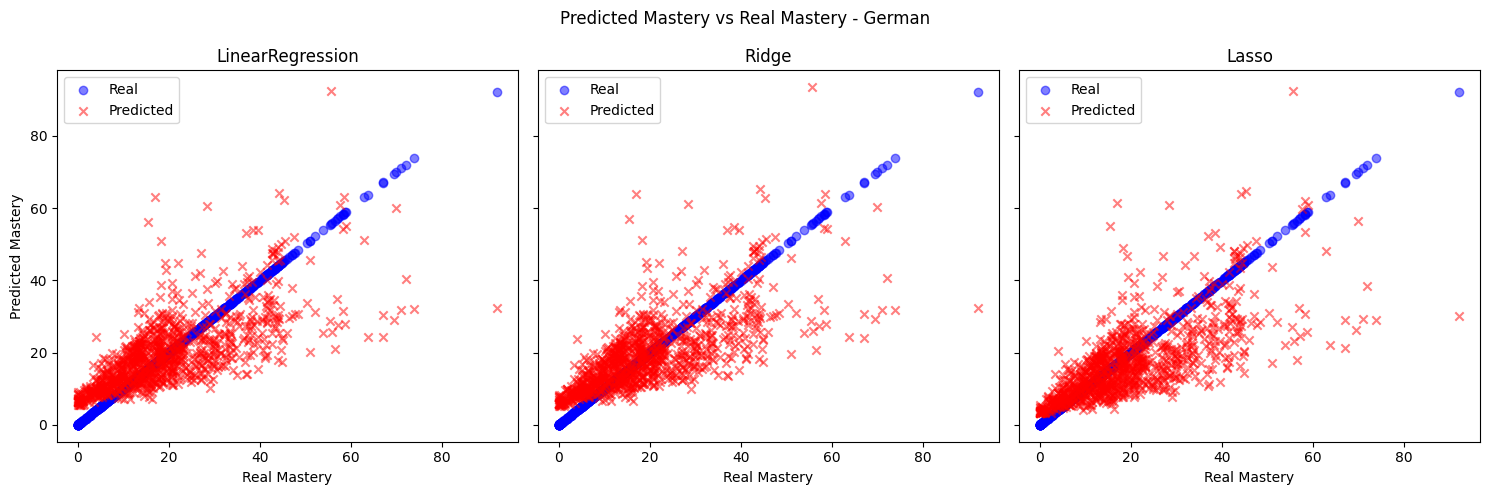

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(target_X)

    axs[idx].scatter(target_y, target_y, alpha=0.5, marker='o', color='blue', label='Real')
    axs[idx].scatter(target_y, y_pred, alpha=0.5, marker='x', color='red', label='Predicted')
    axs[idx].set_title(model_name)
    axs[idx].set_xlabel('Real Mastery')
    axs[idx].legend(loc='upper left')

axs[0].set_ylabel('Predicted Mastery')
plt.suptitle('Predicted Mastery vs Real Mastery - German')
plt.tight_layout()
plt.show()

#### Math

In [4]:
math_filenames = [
    'math_gamma_0.1_k_2_window_0.csv',
    'math_gamma_0.1_k_2_window_1.csv',
    'math_gamma_0.1_k_2_window_3.csv',
    'math_gamma_0.1_k_3_window_0.csv',
    'math_gamma_0.1_k_3_window_1.csv',
    'math_gamma_0.1_k_3_window_3.csv',
    'math_gamma_0.1_k_4_window_0.csv',
    'math_gamma_0.1_k_4_window_1.csv',
    'math_gamma_0.1_k_4_window_3.csv',
    'math_gamma_2_k_2_window_0.csv',
    'math_gamma_2_k_2_window_1.csv',
    'math_gamma_2_k_2_window_3.csv',
    'math_gamma_2_k_3_window_0.csv',
    'math_gamma_2_k_3_window_1.csv',
    'math_gamma_2_k_3_window_3.csv',
    'math_gamma_2_k_4_window_0.csv',
    'math_gamma_2_k_4_window_1.csv',
    'math_gamma_2_k_4_window_3.csv',
    'math_gamma_5_k_2_window_0.csv',
    'math_gamma_5_k_2_window_1.csv',
    'math_gamma_5_k_2_window_3.csv',
    'math_gamma_5_k_3_window_0.csv',
    'math_gamma_5_k_3_window_1.csv',
    'math_gamma_5_k_3_window_3.csv',
    'math_gamma_5_k_4_window_0.csv',
    'math_gamma_5_k_4_window_1.csv',
    'math_gamma_5_k_4_window_3.csv',
]


In [5]:
mathematics = open_file(file_name="math_gamma_0.1_k_2_window_1.csv", path="cluster_csv")
mathematics = mathematics.drop("Unnamed: 0", axis=1)
mathematics.head()
data = mathematics.fillna(0)

WEEK_COUNT = 6

# Filter the data to include rows with weeks_since_first_transaction <= Week count - 1
filtered_data = data[data['weeks_since_first_transaction'] <= WEEK_COUNT - 1]

# Filter the data again to get target rows with weeks_since_first_transaction = Week count
target_data = data[data['weeks_since_first_transaction'] == WEEK_COUNT]

# Define features and target variable for the regression
X = filtered_data.drop(columns=['user_id', 'title', 'mastery'])
y = filtered_data['mastery']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and their hyperparameters
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

alphas = np.logspace(-3, 3, 20)  # Regularization strengths for Ridge and Lasso

# Perform grid search for each model
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        print(f"{model_name} - Mean Squared Error: {mse}")
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_model = grid_search.best_estimator_
        mse = mean_squared_error(y_test, best_model.predict(X_test))
        print(f"{model_name} (alpha={best_alpha}) - Mean Squared Error: {mse}")

[FOUND] File : math_gamma_0.1_k_2_window_1.csv
	Opening math_gamma_0.1_k_2_window_1.csv dataset
	File loaded with : 5131 lines and 12 columns
LinearRegression - Mean Squared Error: 26.286753880395484
Ridge (alpha=0.001) - Mean Squared Error: 26.28675380277158
Lasso (alpha=1.438449888287663) - Mean Squared Error: 26.52307172605141


##### Test Step

In [ ]:
target_X = target_data.drop(columns=['user_id', 'title', 'mastery'])
target_y = target_data['mastery']

# Perform grid search for each model and store the best models
best_models = {}
for model_name, model in models.items():
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        best_models[model_name] = model
    else:
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
        grid_search.fit(X_train, y_train)
        best_alpha = grid_search.best_params_['alpha']
        best_models[model_name] = grid_search.best_estimator_

# Evaluate and print the MSE for each model on the target_data
test_mse_math = []
test_rmse_math = []
test_mae_math = []

for model_name, model in best_models.items():
    y_pred = model.predict(target_X)
    mse = mean_squared_error(target_y, y_pred)
    rmse = mean_squared_error(target_y, y_pred, squared=False)
    mae = mean_absolute_error(target_y, y_pred)

    test_mse_math.append(mse)
    test_rmse_math.append(rmse)
    test_mae_math.append(mae)

    if model_name == 'LinearRegression':
        print(f"{model_name} - Mean Squared Error: {mse}")
        print(f"{model_name} - Root Mean Squared Error: {rmse}")
        print(f"{model_name} - Mean Absolute Error: {mae}")
    else:
        alpha = model.alpha
        print(f"{model_name} (alpha={alpha}) - Mean Squared Error: {mse}")
        print(f"{model_name} (alpha={alpha}) - Root Mean Squared Error: {rmse}")
        print(f"{model_name} (alpha={alpha}) - Mean Absolute Error: {mae}")

LinearRegression - Mean Squared Error: 58.52339292126139
LinearRegression - Root Mean Squared Error: 7.650058360644145
LinearRegression - Mean Absolute Error: 5.327752341828031
Ridge (alpha=0.001) - Mean Squared Error: 58.52339274020388
Ridge (alpha=0.001) - Root Mean Squared Error: 7.650058348810411
Ridge (alpha=0.001) - Mean Absolute Error: 5.327752281252882
Lasso (alpha=1.438449888287663) - Mean Squared Error: 60.8040267087313
Lasso (alpha=1.438449888287663) - Root Mean Squared Error: 7.797693678821405
Lasso (alpha=1.438449888287663) - Mean Absolute Error: 5.180545854355172


##### Explainability

In [ ]:
# Feature names
feature_names = target_X.columns.tolist()

# Display coefficients of each model
for model_name, model in best_models.items():
    if hasattr(model, "coef_"):
        print(f"{model_name} coefficients:")
        for feature, coef in zip(feature_names, model.coef_):
            print(f"{feature}: {coef}")
    else:
        print(f"{model_name} does not have coefficients")
    print()

LinearRegression coefficients:
weeks_since_first_transaction: 0.5878355150041276
diligence: 0.003913645343454186
num_questions: -0.04280883993403857
percentage_correct: 0.007289129273559543
num_review: -0.017887226305545862
num_view: 0.04416958668537144
ratio_window_visible: -0.5343478429343129
cluster: 0.007556508992953348

Ridge coefficients:
weeks_since_first_transaction: 0.5878354321850159
diligence: 0.003913645388253568
num_questions: -0.042808839210999636
percentage_correct: 0.007289127914780148
num_review: -0.017887227945371655
num_view: 0.044169580850140513
ratio_window_visible: -0.5343459971346991
cluster: 0.00755649329020438

Lasso coefficients:
weeks_since_first_transaction: 0.012591443424283442
diligence: 0.004119475765715244
num_questions: -0.01892387104593885
percentage_correct: 0.00400101202716081
num_review: -0.00500674831331922
num_view: 0.01650798347074086
ratio_window_visible: -0.0
cluster: 0.0



##### Visualization

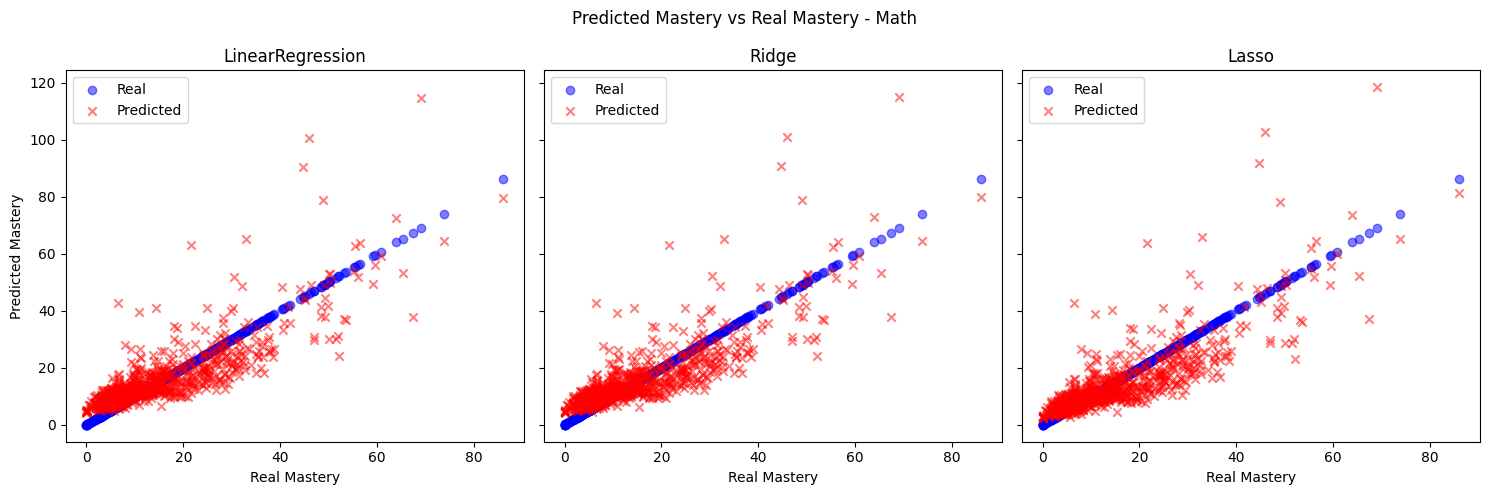

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for idx, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(target_X)

    axs[idx].scatter(target_y, target_y, alpha=0.5, marker='o', color='blue', label='Real')
    axs[idx].scatter(target_y, y_pred, alpha=0.5, marker='x', color='red', label='Predicted')
    axs[idx].set_title(model_name)
    axs[idx].set_xlabel('Real Mastery')
    axs[idx].legend(loc='upper left')

axs[0].set_ylabel('Predicted Mastery')
plt.suptitle('Predicted Mastery vs Real Mastery - Math')
plt.tight_layout()
plt.show()

---

### LSTM and GRU

For LSTM and GRU models we created a **lstm_functions.py** script to define two deep learning models, an LSTM (Long Short-Term Memory) model and a GRU (Gated Recurrent Unit) model, along with a custom dataset class for loading and pre-processing the data. The models are intended to predict the mastery variable for a target week, given the input sequence of data from the preceding weeks.

#### Load Necessary Libraries

In [5]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2" # limiting to one GPU
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Deutsch

#### LSTM

##### Step 1: Creation of test and train dataframes

In [7]:
# Fill NaN values with 0
deutsch_data.fillna(0, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
deutsch_data[['diligence','num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']] = scaler.fit_transform(deutsch_data[['diligence', 'num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']])


File german_gamma_0.1_k_2_window_0.csv

Mean Squared Error: 30.399667040100677
Root Mean Squared Error: 5.513589306441012
Mean Absolute Error: 3.285875356962606

File german_gamma_0.1_k_2_window_1.csv

Mean Squared Error: 33.0091563298326
Root Mean Squared Error: 5.745359547481132
Mean Absolute Error: 3.5419009141533766

File german_gamma_0.1_k_2_window_3.csv

Mean Squared Error: 30.64694429583691
Root Mean Squared Error: 5.535968234720726
Mean Absolute Error: 3.6702830185813218

File german_gamma_0.1_k_3_window_0.csv

Mean Squared Error: 31.46351806858158
Root Mean Squared Error: 5.609235069827398
Mean Absolute Error: 3.404205625013066

File german_gamma_0.1_k_3_window_1.csv

Mean Squared Error: 32.02874838881768
Root Mean Squared Error: 5.65939470162823
Mean Absolute Error: 3.4989147411409616

File german_gamma_0.1_k_3_window_3.csv

Mean Squared Error: 31.907774036068375
Root Mean Squared Error: 5.648696667025799
Mean Absolute Error: 3.574761882278348

File german_gamma_0.1_k_4_wind

In [ ]:
user_ids = deutsch_data['user_id'].unique()
valid_user_ids = []

for user_id in user_ids:
    user_data = deutsch_data[deutsch_data['user_id'] == user_id]
    if len(user_data) > 6:
        valid_user_ids.append(user_id)

valid_mastery_df_german = deutsch_data[deutsch_data['user_id'].isin(valid_user_ids)]

train_user_ids, test_user_ids = train_test_split(valid_user_ids, test_size=0.2, random_state=42)
train_df = valid_mastery_df_german[valid_mastery_df_german['user_id'].isin(train_user_ids)]
test_df = valid_mastery_df_german[valid_mastery_df_german['user_id'].isin(test_user_ids)]

print("Train data frame unique user count:", train_df['user_id'].nunique())
print("Test data frame unique user count:", test_df['user_id'].nunique())

Train data frame unique user count: 819
Test data frame unique user count: 205


In [ ]:
from lstm_functions import MasteryDataset

train_dataset = MasteryDataset(train_df)
test_dataset = MasteryDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

print(len(train_dataset))
print(len(test_dataset))

819
205


**MasteryDataset** class: This class is a custom PyTorch dataset that takes a pandas dataframe df and a target_week as input. The dataset is designed to provide the input sequences and corresponding target values for the LSTM and GRU models.
- The **_get_filtered_user_ids** method filters out user_ids that have data for the target week.
- The __getitem__ method returns an input sequence and the target value for a given index. It pads the input sequence with zeros if necessary to match the target week's length and creates tensors from the input sequence and target value.

In [ ]:
from lstm_functions import LSTMModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = train_dataset[0][0].shape[1]
hidden_size = 64
num_layers = 4
output_size = 1
learning_rate = 0.0001

model = LSTMModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 123,265 trainable parameters


**LSTMModel** class: This class defines an LSTM model that inherits from PyTorch's nn.Module class. It takes the input size, hidden size, number of layers, output size, and a device as input arguments.
- The LSTM layers are defined using the nn.LSTM module with the given input size, hidden size, and number of layers.
- Two fully connected linear layers (nn.Linear) are added after the LSTM layers.
- The **forward** method takes an input tensor x, initializes the hidden and cell states h0 and c0, and passes the input through the LSTM layers, followed by the linear layers with a ReLU activation function in between.

##### Step 2: Train the model

In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 28271.2167
Epoch [2/50], Loss: 28526.2042
Epoch [3/50], Loss: 25242.1176
Epoch [4/50], Loss: 21317.6861
Epoch [5/50], Loss: 18712.7090
Epoch [6/50], Loss: 16116.6449
Epoch [7/50], Loss: 14374.7580
Epoch [8/50], Loss: 12757.6960
Epoch [9/50], Loss: 12305.6220
Epoch [10/50], Loss: 10705.1249
Epoch [11/50], Loss: 10085.7034
Epoch [12/50], Loss: 10530.6870
Epoch [13/50], Loss: 9404.1462
Epoch [14/50], Loss: 9328.2584
Epoch [15/50], Loss: 9354.8507
Epoch [16/50], Loss: 9263.9697
Epoch [17/50], Loss: 8184.9692
Epoch [18/50], Loss: 7243.6354
Epoch [19/50], Loss: 6554.2793
Epoch [20/50], Loss: 6013.4673
Epoch [21/50], Loss: 5100.0809
Epoch [22/50], Loss: 4410.2103
Epoch [23/50], Loss: 3910.3740
Epoch [24/50], Loss: 3515.1214
Epoch [25/50], Loss: 3171.9265
Epoch [26/50], Loss: 2896.4117
Epoch [27/50], Loss: 2664.7452
Epoch [28/50], Loss: 2452.2119
Epoch [29/50], Loss: 2314.1960
Epoch [30/50], Loss: 2171.2497
Epoch [31/50], Loss: 2059.1905
Epoch [32/50], Loss: 1928.4766
Epoch

##### Step 3: Test the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()
predictions_german_lstm = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_german_lstm.extend(outputs.cpu().numpy().tolist())

real_values_german = test_df[test_df["weeks_since_first_transaction"] == 6]
# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_german["mastery"], predictions_german_lstm)
rmse = mean_squared_error(real_values_german["mastery"], predictions_german_lstm, squared =False)
mae = mean_absolute_error(real_values_german["mastery"], predictions_german_lstm)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 31.357500391190968
Root Mean Squared Error: 5.599776816194639
Mean Absolute Error: 3.508668598783339


After obtaining the predictions, the ground truth values for the test dataset are extracted from the test_df dataframe for rows where the weeks_since_first_transaction value is 6.

#### GRU

##### Step 1: Build the model

In [ ]:
from lstm_functions import GRUModel
model = GRUModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 93,505 trainable parameters


**GRUModel** class: This class defines a GRU model, similar to the **LSTMModel** class, but it uses the nn.GRU module instead of the nn.LSTM module. The GRU model also inherits from PyTorch's nn.Module class and takes the same input arguments as the LSTM model.
- The GRU layers are defined using the nn.GRU module with the given input size, hidden size, and number of layers.
- Two fully connected linear layers (nn.Linear) are added after the GRU layers.
- The forward method takes an input tensor x, initializes the hidden state h0, and passes the input through the GRU layers, followed by the linear layers with a ReLU activation function in between.

##### Step 2: Train the model

In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 27544.0455
Epoch [2/50], Loss: 25953.7050
Epoch [3/50], Loss: 20931.6786
Epoch [4/50], Loss: 18055.3254
Epoch [5/50], Loss: 15907.3084
Epoch [6/50], Loss: 14278.0026
Epoch [7/50], Loss: 12664.4206
Epoch [8/50], Loss: 11388.4123
Epoch [9/50], Loss: 10648.1246
Epoch [10/50], Loss: 10236.1527
Epoch [11/50], Loss: 9277.0071
Epoch [12/50], Loss: 8196.4040
Epoch [13/50], Loss: 7850.3131
Epoch [14/50], Loss: 6529.0585
Epoch [15/50], Loss: 5713.3767
Epoch [16/50], Loss: 4976.5096
Epoch [17/50], Loss: 4443.1330
Epoch [18/50], Loss: 4000.2641
Epoch [19/50], Loss: 3658.0415
Epoch [20/50], Loss: 3237.9924
Epoch [21/50], Loss: 3038.6798
Epoch [22/50], Loss: 2737.2212
Epoch [23/50], Loss: 2519.6064
Epoch [24/50], Loss: 2336.3780
Epoch [25/50], Loss: 2615.1750
Epoch [26/50], Loss: 2046.7019
Epoch [27/50], Loss: 1950.8644
Epoch [28/50], Loss: 1839.4950
Epoch [29/50], Loss: 1755.7593
Epoch [30/50], Loss: 1686.4596
Epoch [31/50], Loss: 1618.5604
Epoch [32/50], Loss: 1694.9012
Epoch [

##### Step 3: Test the model

In [ ]:
model.eval()
predictions_german_gru = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_german_gru.extend(outputs.cpu().numpy().tolist())

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_german["mastery"], predictions_german_gru)
rmse = mean_squared_error(real_values_german["mastery"], predictions_german_gru, squared =False)
mae = mean_absolute_error(real_values_german["mastery"], predictions_german_gru)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 33.21044265614693
Root Mean Squared Error: 5.762850219825857
Mean Absolute Error: 3.2480679101073013


##### If all predictions are 0

In [ ]:
predictions = [0] * len(test_dataset)

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_german["mastery"], predictions)
rmse = mean_squared_error(real_values_german["mastery"], predictions, squared =False)
mae = mean_absolute_error(real_values_german["mastery"], predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 574.1860485739309
Root Mean Squared Error: 23.962179545565775
Mean Absolute Error: 19.969150250905418


### Math

#### LSTM

#### Step 1: Build the model

In [ ]:
# Fill NaN values with 0
mathematics.fillna(0, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
mathematics[['diligence', 'num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']] = scaler.fit_transform(mathematics[['diligence', 'num_questions', 'percentage_correct', 'num_review', 'num_view', 'ratio_window_visible', 'cluster']])

In [ ]:
user_ids = mathematics['user_id'].unique()
valid_user_ids = []

for user_id in user_ids:
    user_data = mathematics[mathematics['user_id'] == user_id]
    if len(user_data) > 6:
        valid_user_ids.append(user_id)

valid_mastery_df_math = mathematics[mathematics['user_id'].isin(valid_user_ids)]

train_user_ids, test_user_ids = train_test_split(valid_user_ids, test_size=0.2, random_state=42)
train_df = valid_mastery_df_math[valid_mastery_df_math['user_id'].isin(train_user_ids)]
test_df = valid_mastery_df_math[valid_mastery_df_math['user_id'].isin(test_user_ids)]

print("Train data frame unique user count:", train_df['user_id'].nunique())
print("Test data frame unique user count:", test_df['user_id'].nunique())

Train data frame unique user count: 586
Test data frame unique user count: 147


In [ ]:
from lstm_functions import MasteryDataset

train_dataset = MasteryDataset(train_df)
test_dataset = MasteryDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

print(len(train_dataset))
print(len(test_dataset))

586
147


In [ ]:
from lstm_functions import LSTMModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = train_dataset[0][0].shape[1]
hidden_size = 64
num_layers = 4
output_size = 1
learning_rate = 0.0001

model = LSTMModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 123,265 trainable parameters


#### Step 2: Train the model

In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 15942.4105
Epoch [2/50], Loss: 15860.2937
Epoch [3/50], Loss: 15409.3289
Epoch [4/50], Loss: 13948.2478
Epoch [5/50], Loss: 12298.5427
Epoch [6/50], Loss: 10928.7356
Epoch [7/50], Loss: 10071.8124
Epoch [8/50], Loss: 9387.3860
Epoch [9/50], Loss: 8748.4146
Epoch [10/50], Loss: 8151.2751
Epoch [11/50], Loss: 7751.5572
Epoch [12/50], Loss: 7305.3103
Epoch [13/50], Loss: 7159.4939
Epoch [14/50], Loss: 6814.7753
Epoch [15/50], Loss: 6706.1766
Epoch [16/50], Loss: 6657.3962
Epoch [17/50], Loss: 6469.6935
Epoch [18/50], Loss: 6371.5071
Epoch [19/50], Loss: 6535.6143
Epoch [20/50], Loss: 6090.7701
Epoch [21/50], Loss: 5348.5543
Epoch [22/50], Loss: 5006.3616
Epoch [23/50], Loss: 4623.1541
Epoch [24/50], Loss: 4285.7305
Epoch [25/50], Loss: 3986.4728
Epoch [26/50], Loss: 3686.9554
Epoch [27/50], Loss: 3464.5446
Epoch [28/50], Loss: 3201.8975
Epoch [29/50], Loss: 3005.2223
Epoch [30/50], Loss: 2826.9050
Epoch [31/50], Loss: 2639.0619
Epoch [32/50], Loss: 2492.0173
Epoch [33/

#### Step 3: Test the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

model.eval()
predictions_math_lstm = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_math_lstm.extend(outputs.cpu().numpy().tolist())

real_values_math = test_df[test_df["weeks_since_first_transaction"] == 6]
# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_math["mastery"], predictions_math_lstm)
rmse = mean_squared_error(real_values_math["mastery"], predictions_math_lstm, squared =False)
mae = mean_absolute_error(real_values_math["mastery"], predictions_math_lstm)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 18.77853079046441
Root Mean Squared Error: 4.333420218541517
Mean Absolute Error: 2.8546182526906247


#### GRU

##### Step 1: Build the model

In [ ]:
from lstm_functions import GRUModel
model = GRUModel(input_size, hidden_size, num_layers, output_size, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_params = np.sum(np.fromiter((p.numel() for p in model.parameters() if p.requires_grad), dtype=int))
print(f'The model has {num_params:,} trainable parameters')

The model has 93,505 trainable parameters


##### Step 2: Train the model

In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/50], Loss: 15823.4239
Epoch [2/50], Loss: 15282.5539
Epoch [3/50], Loss: 14247.0091
Epoch [4/50], Loss: 12958.9053
Epoch [5/50], Loss: 11817.9459
Epoch [6/50], Loss: 10706.4899
Epoch [7/50], Loss: 9846.9770
Epoch [8/50], Loss: 9275.8680
Epoch [9/50], Loss: 8569.5927
Epoch [10/50], Loss: 8024.7839
Epoch [11/50], Loss: 7611.9759
Epoch [12/50], Loss: 7226.9408
Epoch [13/50], Loss: 7192.0779
Epoch [14/50], Loss: 6697.6778
Epoch [15/50], Loss: 6175.8838
Epoch [16/50], Loss: 5787.1153
Epoch [17/50], Loss: 5403.7467
Epoch [18/50], Loss: 4919.5022
Epoch [19/50], Loss: 4482.7754
Epoch [20/50], Loss: 4109.0240
Epoch [21/50], Loss: 3808.9719
Epoch [22/50], Loss: 3496.2324
Epoch [23/50], Loss: 3342.0669
Epoch [24/50], Loss: 3031.4029
Epoch [25/50], Loss: 2846.3404
Epoch [26/50], Loss: 2820.8110
Epoch [27/50], Loss: 2508.9512
Epoch [28/50], Loss: 2403.2540
Epoch [29/50], Loss: 2241.3011
Epoch [30/50], Loss: 2136.0132
Epoch [31/50], Loss: 2053.6799
Epoch [32/50], Loss: 1986.1702
Epoch [33/5

##### Step 3: Test the model

In [ ]:
model.eval()
predictions_math_gru = []
test_loss = 0
num_test_samples = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predictions_math_gru.extend(outputs.cpu().numpy().tolist())

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_math["mastery"], predictions_math_gru)
rmse = mean_squared_error(real_values_math["mastery"], predictions_math_gru, squared =False)
mae = mean_absolute_error(real_values_math["mastery"], predictions_math_gru)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 14.07370884166826
Root Mean Squared Error: 3.751494214532159
Mean Absolute Error: 2.51595029181101


##### If all predictions are 0

In [ ]:
predictions = [0] * len(test_dataset)

# Calculate the Mean Squared Error
mse = mean_squared_error(real_values_math["mastery"], predictions)
rmse = mean_squared_error(real_values_math["mastery"], predictions, squared =False)
mae = mean_absolute_error(real_values_math["mastery"], predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 393.9993772646853
Root Mean Squared Error: 19.84941755479705
Mean Absolute Error: 15.648943071439573


The results presented above are based on a model that predicts all zeros for the test dataset, essentially serving as a naive baseline. The performance of this baseline model is evaluated using three metrics: 
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE). 

With an MSE of 392.008, an RMSE of 19.799, and an MAE of 15.227, the baseline model demonstrates a significant error when predicting the 'mastery' variable.

*Your discussion about your model training goes here*

**DISCUSSION**: In the regression section, we initially focused on data preprocessing and filtering. The data was filtered based on the 'weeks_since_first_transaction' column to create two separate dataframes: one with rows where the weeks are less than or equal to WEEK_COUNT - 1 (filtered_data) and another with rows where the weeks equal WEEK_COUNT (target_data). Next, we defined the features and target variable for the regression task, excluding 'user_id', 'title', and 'mastery' columns from the feature set. The data was then split into training and testing sets using a 70/30 split.

In the LSTM and GRU section, we first created a custom PyTorch dataset class, MasteryDataset, to handle the data preparation and processing for our time series data. This class is responsible for filtering valid user_ids, handling variable-length sequences by padding with zeros, and returning the input sequence (first six weeks) and target value (mastery at week 6) for each user.

Next, we defined two PyTorch model classes: LSTMModel and GRUModel. Both classes contain an RNN layer (LSTM or GRU, respectively), followed by two linear layers with a ReLU activation function after the first linear layer. These models are designed to accept input sequences and output a single value representing the predicted mastery at week 6.

After defining the models, we trained the LSTM model using the Mean Squared Error (MSE) loss as the objective function and the Adam optimizer. The model was evaluated on the test set using a DataLoader, which allowed us to process test data in batches. The evaluation metrics used for the LSTM model include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

A similar process was carried out for the GRU model, using the same training parameters, evaluation metrics, and test set. 



---

## Model Evaluation
In this task, you will use metrics to evaluate your model.

**METRICS**

Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) are popular evaluation metrics for regression tasks because they provide valuable insights into the performance of a model in predicting continuous outcomes. Each of these metrics has its unique advantages and contributes to the overall understanding of model performance.

- **Mean Squared Error (MSE)**: MSE measures the average squared difference between the predicted values and the actual values. By squaring the errors, MSE puts more emphasis on larger errors and penalizes them heavily. 
- **Mean Absolute Error (MAE)**: MAE calculates the average absolute difference between the predicted values and the actual values. This metric provides a more interpretable measure of the average error magnitude, as it is on the same scale as the target variable.
- **Root Mean Squared Error (RMSE)**: This metric combines the sensitivity to large errors (as in MSE) with the interpretability of the error scale (as in MAE). RMSE represents the standard deviation of the residuals (prediction errors) and provides an easily understandable measure of the average error magnitude.

### Regression Models

#### Math

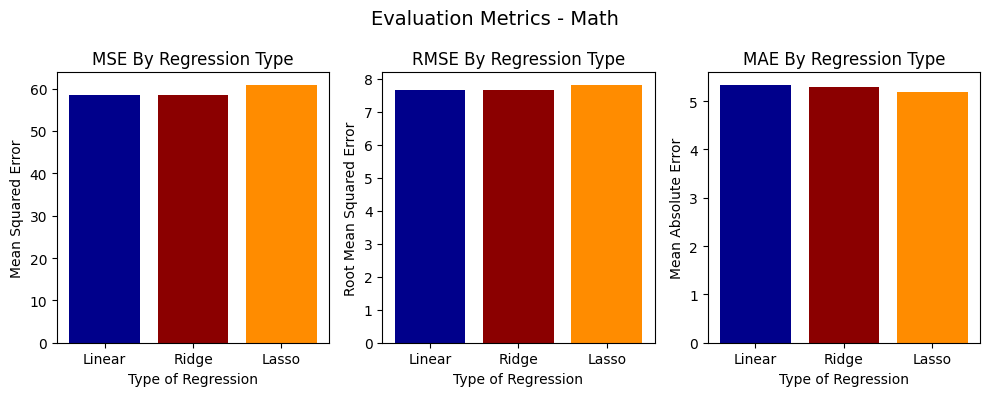

In [ ]:
#Plot and compare the test performances of regressions
reg_labels = ['Linear', 'Ridge', 'Lasso']

#Mean Squared Error
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].bar(reg_labels, test_mse_math, color=['darkblue', 'darkred', 'darkorange'])
axs[0].set_title('MSE By Regression Type')
axs[0].set_xlabel('Type of Regression')
axs[0].set_ylabel('Mean Squared Error')

#Root Mean Squared Error
axs[1].bar(reg_labels, test_rmse_math, color=['darkblue', 'darkred', 'darkorange'])
axs[1].set_title('RMSE By Regression Type')
axs[1].set_xlabel('Type of Regression')
axs[1].set_ylabel('Root Mean Squared Error')

#Mean Absolute Error
axs[2].bar(reg_labels, test_mae_math, color=['darkblue', 'darkred', 'darkorange'])
axs[2].set_title('MAE By Regression Type')
axs[2].set_xlabel('Type of Regression')
axs[2].set_ylabel('Mean Absolute Error')

plt.suptitle("Evaluation Metrics - Math", fontsize = 14)
plt.tight_layout()

#### German

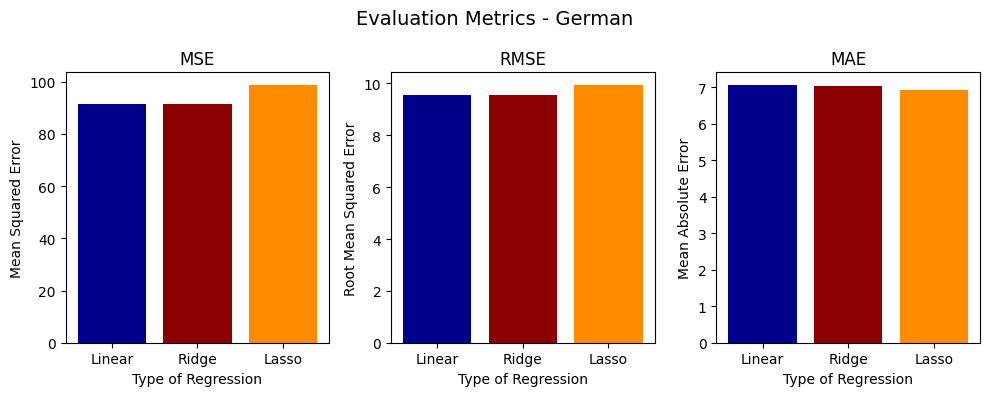

In [ ]:
#Plot and compare the test performances of regressions
reg_labels = ['Linear', 'Ridge', 'Lasso']

#Mean Squared Error
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].bar(reg_labels, test_mse_german, color=['darkblue', 'darkred', 'darkorange'])
axs[0].set_title('MSE')
axs[0].set_xlabel('Type of Regression')
axs[0].set_ylabel('Mean Squared Error')

#Root Mean Squared Error
axs[1].bar(reg_labels, test_rmse_german, color=['darkblue', 'darkred', 'darkorange'])
axs[1].set_title('RMSE')
axs[1].set_xlabel('Type of Regression')
axs[1].set_ylabel('Root Mean Squared Error')

#Mean Absolute Error
axs[2].bar(reg_labels, test_mae_german, color=['darkblue', 'darkred', 'darkorange'])
axs[2].set_title('MAE')
axs[2].set_xlabel('Type of Regression')
axs[2].set_ylabel('Mean Absolute Error')

plt.suptitle("Evaluation Metrics - German", fontsize = 14)
plt.tight_layout()

Following the data preparation, we experimented with three regression models: Linear Regression, Ridge Regression, and Lasso Regression. For Ridge and Lasso Regression, we performed a grid search to identify the optimal alpha (regularization strength) values for each model. The performance of each model was evaluated based on the Mean Squared Error (MSE) on the testing set. 

**Ridge Regression** with an alpha of 1000 demonstrated a slightly better performance compared to Linear Regression, while Lasso Regression with an alpha of 233.572 yielded the worst performance for Math dataset. 

In the German dataset, **Linear Regression** demonstrated a slightly better performance compared to Ridge Regression while Lasso Regression with an alpha of 233.572 yielded the worst performance

### LSTM

#### Math

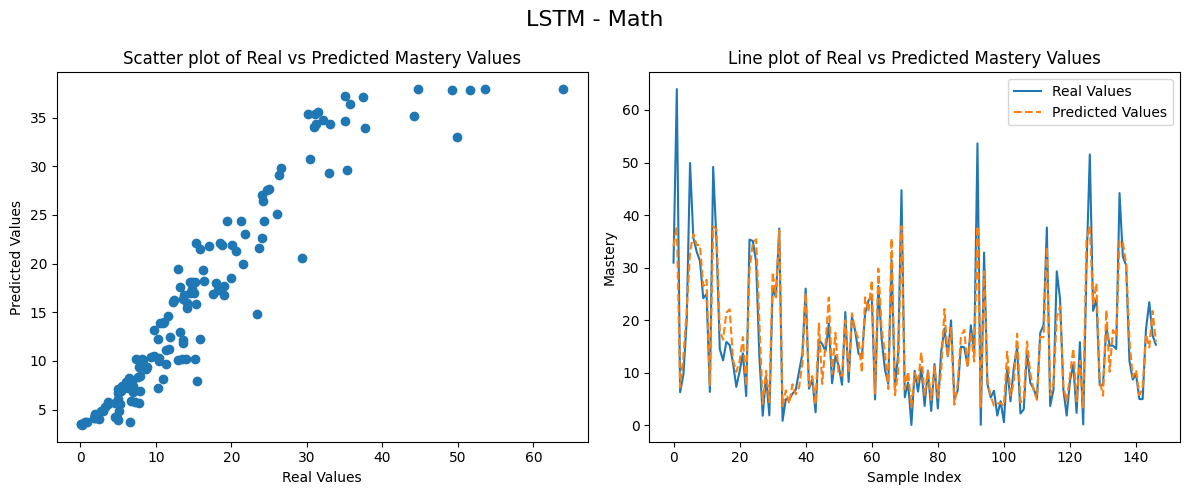

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_math["mastery"], predictions_math_lstm)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_math["mastery"].values, label="Real Values")
ax2.plot(predictions_math_lstm, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("LSTM - Math", fontsize = 16)
plt.tight_layout()
plt.show()

#### German

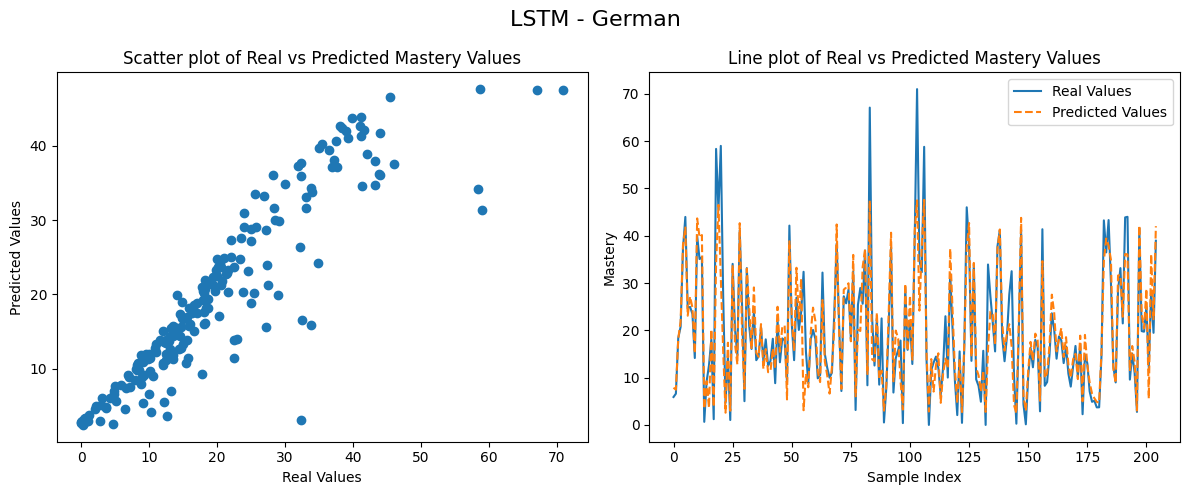

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_german["mastery"], predictions_german_lstm)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_german["mastery"].values, label="Real Values")
ax2.plot(predictions_german_lstm, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("LSTM - German", fontsize = 16)
plt.tight_layout()
plt.show()

### GRU

#### Math

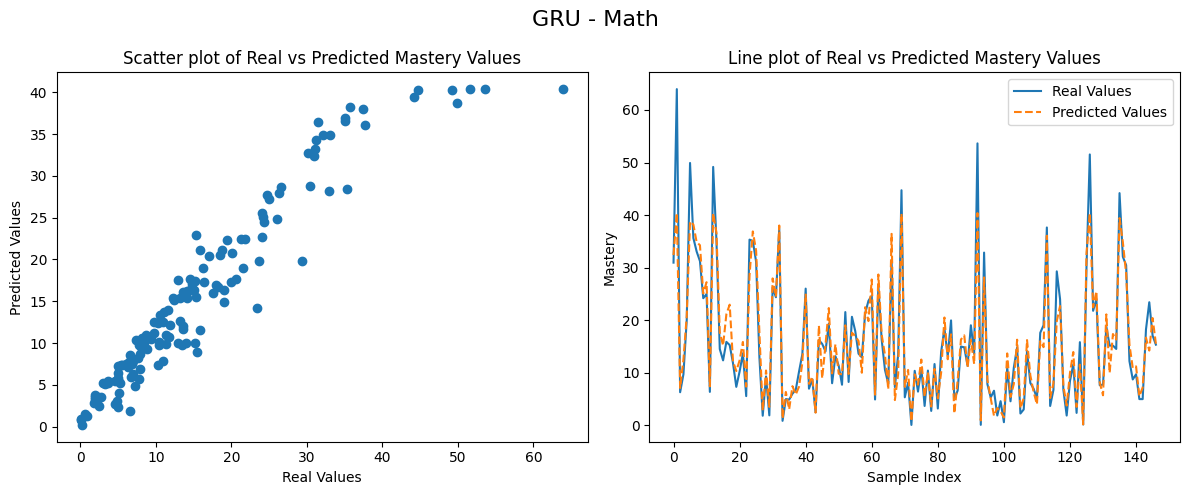

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_math["mastery"], predictions_math_gru)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_math["mastery"].values, label="Real Values")
ax2.plot(predictions_math_gru, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("GRU - Math", fontsize = 16)
plt.tight_layout()
plt.show()

#### German

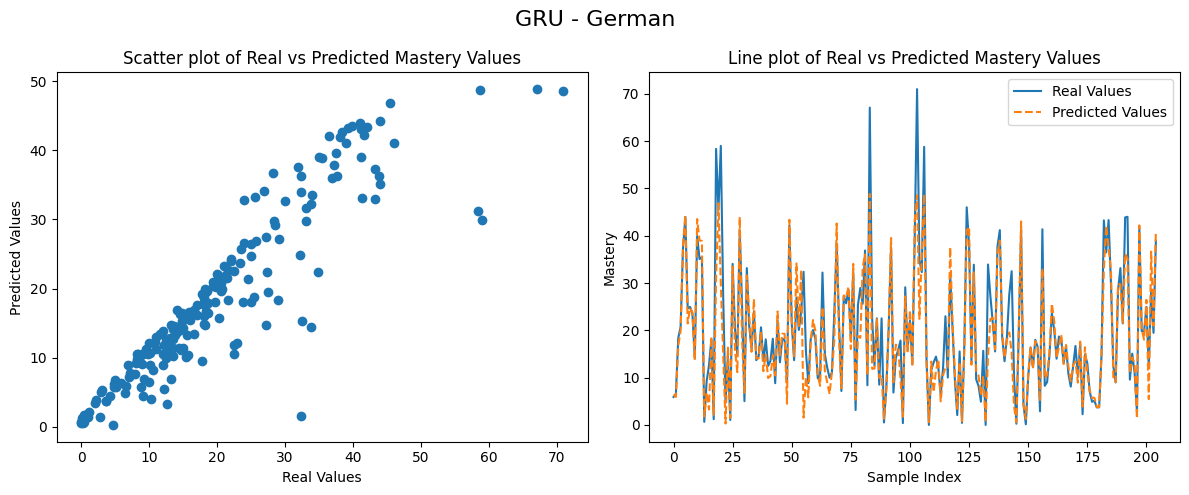

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create a scatter plot
ax1.scatter(real_values_german["mastery"], predictions_german_gru)
ax1.set_xlabel("Real Values")
ax1.set_ylabel("Predicted Values")
ax1.set_title("Scatter plot of Real vs Predicted Mastery Values")

# Create a line plot
ax2.plot(real_values_german["mastery"].values, label="Real Values")
ax2.plot(predictions_german_gru, label="Predicted Values", linestyle="--")
ax2.set_xlabel("Sample Index")
ax2.set_ylabel("Mastery")
ax2.set_title("Line plot of Real vs Predicted Mastery Values")
ax2.legend()

plt.suptitle("GRU - German", fontsize = 16)
plt.tight_layout()
plt.show()

**DISCUSSION**

**MATH**

Baseline model (Prediction of full 0s):
- Mean Squared Error: 392.00874191510013
- Root Mean Squared Error: 19.799210638687093
- Mean Absolute Error: 15.227262151480423

For the Math dataset, the LSTM and GRU models once again outperform the baseline model by a significant margin. The LSTM model yields a Mean Squared Error (MSE) of 18.17, a Root Mean Squared Error (RMSE) of 4.26, and a Mean Absolute Error (MAE) of 2.49. Meanwhile, the GRU model has an MSE of 20.40, an RMSE of 4.52, and an MAE of 2.68.

In stark contrast, the baseline model demonstrates much higher error values, with an MSE of 392.01, an RMSE of 19.80, and an MAE of 15.23. The substantial improvement in prediction accuracy provided by the LSTM and GRU models can be attributed to their ability to effectively capture temporal patterns and dependencies in the dataset. These results further highlight the effectiveness of LSTM and GRU models for predicting mastery at week 6, in comparison to the baseline model.

**GERMAN**

Baseline Model (Prediction of full 0s):
- Mean Squared Error: 598.2922590590904
- Root Mean Squared Error: 24.460013472177206
- Mean Absolute Error: 20.286615810758597

In the German dataset, the LSTM and GRU models show significantly better performance than the baseline model. The LSTM model achieves a Mean Squared Error (MSE) of 21.73, a Root Mean Squared Error (RMSE) of 4.66, and a Mean Absolute Error (MAE) of 3.20. The GRU model has an MSE of 23.24, an RMSE of 4.82, and an MAE of 3.11.

In comparison, the baseline model exhibits much higher error values, with an MSE of 598.29, an RMSE of 24.46, and an MAE of 20.29. This considerable difference in performance indicates that the LSTM and GRU models are more effective in predicting mastery at week 6 than the baseline model. Both LSTM and GRU models demonstrate their ability to capture temporal patterns and dependencies in the data, leading to substantially improved prediction accuracy.

---